# Data Cleaning

The following sections of code handle data cleaning. The provided dataset addresses the following issues:

- Data quality issues are addressed in the right way (missing value imputation, outlier treatment, and other kinds of data redundancies, etc.).
- If applicable, data is converted to a suitable and convenient format to work with using the right methods.
- Manipulation of strings and dates is done correctly wherever required.




In [154]:
## import all the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [155]:
#reading the data
loan_data = pd.read_csv("loan.csv")
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [156]:
#analysing the number of rows & columns

loan_data.shape

(39717, 111)

So, we have basically 39717 rows and 111 columns

In [157]:
#checking the columns with all null values
null_columns = loan_data.columns[loan_data.isnull().all()]

null_columns

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

The above list of columns has all null records

# Let's start by removing them as we won't require null data for further analysis







In [158]:
loan_data.dropna(axis = 1, how = 'all', inplace = True)
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... next_pymnt_d last_credit_pull_d  \
0   10.65%       162.87     B        B2  ...          NaN             May-16   
1   15.27%        59.83     C        C4  ...          NaN             Sep-13   
2   15.96%        84.33     C        C5  ...          NaN             May-16   
3   13.49%       339.31     C        C1  ...          NaN             Apr-16   
4   12.69%        67.79     B        B5  ...       Jun-16             May-16   

  collections_12_mths_ex_med  policy_code application_type acc_now_delinq  \
0                        0.0            1       INDIVIDUAL              0   
1                        0.0            1       INDIVIDUAL              0   
2                        0.0            1       INDIVIDUAL              0   
3                        0.0            1       INDIVIDUAL              0   
4                        0.0            1       INDIVIDUAL              0   

  chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies tax_liens  
0                      0.0           0                  0.0       0.0  
1                      0.0           0                  0.0       0.0  
2                      0.0           0                  0.0       0.0  
3                      0.0           0                  0.0       0.0  
4                      0.0           0                  0.0       0.0  

[5 rows x 57 columns]

Initially there were 111 columns, after removing columns with all NaN values, we are left with 57 columns. Let's further inspect the percentage of null values in the column, and see if it is wise to drop them

# Let's consider the threshold  for missing values as 50%

In [159]:
#Get records with very high percentage of missing values.
columnsWithHighNaN = round(100*loan_data.isnull().mean(),2) 
columnsWithHighNaN = columnsWithHighNaN[columnsWithHighNaN > 50]
columnsWithHighNaN

mths_since_last_delinq    64.66
mths_since_last_record    92.99
next_pymnt_d              97.13
dtype: float64

# Removing the above columns

In [160]:
loan_data = loan_data.drop(axis=1, columns=list(columnsWithHighNaN.keys()))
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... last_pymnt_amnt  \
0   10.65%       162.87     B        B2  ...          171.62   
1   15.27%        59.83     C        C4  ...          119.66   
2   15.96%        84.33     C        C5  ...          649.91   
3   13.49%       339.31     C        C1  ...          357.48   
4   12.69%        67.79     B        B5  ...           67.79   

  last_credit_pull_d collections_12_mths_ex_med  policy_code application_type  \
0             May-16                        0.0            1       INDIVIDUAL   
1             Sep-13                        0.0            1       INDIVIDUAL   
2             May-16                        0.0            1       INDIVIDUAL   
3             Apr-16                        0.0            1       INDIVIDUAL   
4             May-16                        0.0            1       INDIVIDUAL   

  acc_now_delinq chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies  \
0              0                      0.0           0                  0.0   
1              0                      0.0           0                  0.0   
2              0                      0.0           0                  0.0   
3              0                      0.0           0                  0.0   
4              0                      0.0           0                  0.0   

  tax_liens  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  

[5 rows x 54 columns]

### Now we have 54 columns .

Let's analyse further do we have more columns with high percentage of null values.

In [161]:
round(100*loan_data.isnull().mean(),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.59
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [162]:
# We are left with one column that is desc which has high percentage of NaN values. We need to look at the data
loan_data.loc[0,'desc']

'  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>'

# Let's check dictionary file to check the use of desc column

desc column is "Loan description provided by the borrower". We can see a few columns to understand what exactly is there.

we can't treat the above by dropping columns..

Now dropping columns is done, we need to do missing value treatment for the rows.

First thing is to check if some row has all NaN values


In [163]:
loan_data.shape

(39717, 54)

In [164]:
# percentage of NaN values in the rows.
rowsWithHighNaN = round(100*loan_data.isnull().mean(axis=1))
rowsWithHighNaN

0         2.0
1         0.0
2         4.0
3         0.0
4         0.0
         ... 
39712     7.0
39713     7.0
39714    11.0
39715    11.0
39716     7.0
Length: 39717, dtype: float64

Out of 54 columns in a row, only 11% are missing, that. is 5 to 6 columns are misisng. So we can't straight away remove these rows


# Let's drop duplicate values

In [165]:
loan_data.id.drop_duplicates()

0        1077501
1        1077430
2        1077175
3        1076863
4        1075358
          ...   
39712      92187
39713      90665
39714      90395
39715      90376
39716      87023
Name: id, Length: 39717, dtype: int64

In [166]:
loan_data.shape

(39717, 54)

There are no duplicate rows with the same id

In [167]:
loan_data.duplicated().sum() # no duplicate rows

0

In [168]:
loan_data.groupby(["member_id"])["id"].count().sort_values() # this indicates there is unique id and member_id. 
# that is no member has taken 2 loans.

member_id
70699      1
985270     1
985288     1
985304     1
985348     1
          ..
728264     1
728269     1
728273     1
728200     1
1314167    1
Name: id, Length: 39717, dtype: int64

### Observations on Analyzing Each Column

1. The difference between `funded_amnt` and `funded_amnt_inv` is unclear. We are assuming that out of the total loan_amnt, part of it is funded by investors (funded_amnt_inv), and the remaining is funded by the lending club (funded_amnt).
2. There are no instances of a single member having taken two loans, as observed in previous cells.
3. The `term` column represents the loan term and can be converted from months to years and possibly to an integer. Although it will be an integer, it will be used categorically.
4. The interest rate can be converted to an integer for the purpose of calculating mean/median, if needed.
5. The `issue_d` column should be converted to a date format.
6. The analysis focuses on defaulted loans and their causes, so rows without defaults should be filtered out.
7. The `desc` column appears to be inconsistent and non-categorical. If used, it will require manual categorization.
8. The `purpose` column is likely sufficient for the analysis compared to `desc`, so `desc` can be dropped.
9. The `title` column is provided by the borrower and is not uniform, making it unsuitable for categorization. This column can likely be dropped.
10. The meanings of `revol_bal` and `revol_util` are not clear.
11. The number of open accounts (`open_acc`) cannot exceed the total number of accounts (`total_acc`). Records where this is the case should be deleted.
12. The `initial_list_status` should be either 'w' or 'f'; any other values should be dropped.
13. The purpose of the `total_pymnt_inv` column is unclear.
14. Columns with the same value across all rows have no analytical significance and can be removed.
15. The `url` column is not useful as it contains a static URL appended with the loan ID.


In [169]:
loan_data.application_type.value_counts()/loan_data.shape[0]

application_type
INDIVIDUAL    1.0
Name: count, dtype: float64

# Let's remove all columns which have only 1 unique value

In [170]:
# remove all columns which have only 1 unique value. This will in no way contribute to the output data
uniqueSeries = loan_data.nunique(axis=0,dropna=False) == 1
loan_data.drop(columns=list(uniqueSeries[uniqueSeries].index), inplace=True)

In [171]:
loan_data.shape

(39717, 48)

In [172]:
# title and desc can be dropped
loan_data.drop(columns=["desc","title","url"], inplace=True)

In [173]:
loan_data.groupby(["zip_code","addr_state"])["id"].count()

zip_code  addr_state
007xx     NJ              1
010xx     MA            100
011xx     MA             14
012xx     MA             14
013xx     MA             14
                       ... 
995xx     AK             33
996xx     AK             13
997xx     AK             21
998xx     AK             10
999xx     AK              1
Name: id, Length: 897, dtype: int64

In [174]:
loan_data[loan_data.loan_status != "Current"].shape

(38577, 45)

In [175]:
loan_data.tax_liens.value_counts()

tax_liens
0.0    39678
Name: count, dtype: int64

In [176]:
loan_data["emp_title"].value_counts() #emp_title maybe useful. not dropping this.

emp_title
US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: count, Length: 28820, dtype: int64

In [177]:
loan_data.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [178]:
loan_data[loan_data.collections_12_mths_ex_med!=0.0] # => seems like we can drop this column 0.0 and NaN seems to be giving same kind of information
#chargeoff_within_12_mths => same thing as above
#tax_liens => same thing as above. Drop these 3 columns

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
39629  131387     113921       6000         6000            600.0   36 months   
39642  127213      85483       2000         2000           1575.0   36 months   
39650   84918      84914       5000         5000           2025.0   36 months   
39659  121568     121574       4000         4000           1925.0   36 months   
39660  121535     121373       2800         2800           1625.0   36 months   
39666  119043     119040      15450        15450            600.0   36 months   
39667  118823     118026       2500         2500            675.0   36 months   
39668  118533     117783       2500         2500            825.0   36 months   
39669  118523     118519       6500         6500            225.0   36 months   
39670  117863     117849       8000         8000           2275.0   36 months   
39671  117794      94256       7500         7500            400.0   36 months   
39672  117249     116607       5000         5000           1300.0   36 months   
39673  117056     117046       5000         5000           1475.0   36 months   
39674  116582     116502      10000        10000            975.0   36 months   
39675  116040     116037       5000         5000            775.0   36 months   
39676   88854      70699       5000         5000            225.0   36 months   
39677  113194     113115       3500         3500           1725.0   36 months   
39678  113179     113093       1000         1000            950.0   36 months   
39679  113156     113146       3500         3500           3500.0   36 months   
39680  112496     112493       3000         3000            525.0   36 months   
39681  112323     107671       3500         3500           1125.0   36 months   
39682   99009      98991       5750         5750           3675.0   36 months   
39683  112245     112227       5000         5000           3975.0   36 months   
39684  112216     106279      12000        12000           1025.0   36 months   
39685  100214     100208       5000         5000           3675.0   36 months   
39686  111917     111912       6400         6400           4075.0   36 months   
39687  111307     105982      12000        12000           2500.0   36 months   
39688  111227     111223      20000        20000           2800.0   36 months   
39689  109355     109346       1200         1200              0.0   36 months   
39690  107136     107130      12250        12250           1525.0   36 months   
39691  106360     106333       2700         2700            550.0   36 months   
39692   76597      76583       5000         5000           1775.0   36 months   
39693  106079     106039       3500         3500           1200.0   36 months   
39694   90966      90962       5000         5000           4150.0   36 months   
39695   92440      92423       5000         5000           3100.0   36 months   
39696  102376      95212      25000        25000            525.0   36 months   
39697  101579     100083      10000        10000            400.0   36 months   
39698   98982      98957       5000         5000            675.0   36 months   
39699   98339      97572       5100         5100            575.0   36 months   
39700   98276      98268       5400         5400            200.0   36 months   
39701   96844      95222       5300         5300            600.0   36 months   
39702   96350      96338       5000         5000            850.0   36 months   
39703   94838      73673       3000         3000           2550.0   36 months   
39704   93277      93254       3000         3000            950.0   36 months   
39705   93061      93057       5000         5000            250.0   36 months   
39706   92676      92671       5000         5000            150.0   36 months   
39707   92666      92661       5000         5000            525.0   36 months   
39708   92552      92542       5000         5000            375.0   36 months   
39709   92533      92529       5000       

In [179]:
loan_data.drop(columns=["collections_12_mths_ex_med","chargeoff_within_12_mths","tax_liens"], inplace=True)

In [180]:
loan_data.shape

(39717, 42)

In [181]:
loan_data.pub_rec.value_counts()

pub_rec
0    37601
1     2056
2       51
3        7
4        2
Name: count, dtype: int64

Problem Statement: The company aims to identify the key factors contributing to loan defaults, specifically the variables that are strong indicators of default. This insight will aid in portfolio management and risk assessment. 

Columns that do not contribute to identifying default risk should be excluded from the analysis. For instance, columns like "recoveries" and "collection_recovery_fee" pertain to actions taken after a loan is categorized as charged off and thus are not useful for predicting defaults. We need to identify and exclude similar columns that do not assist in the analysis.

In [182]:
loan_data.drop(columns=["recoveries","collection_recovery_fee"],inplace=True)

In [183]:
loan_data.shape

(39717, 40)

In [184]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [185]:
loan_data.drop(columns=["out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee"],inplace=True)

In [186]:
loan_data.shape

(39717, 33)

In [187]:
loan_data.drop(columns=["last_pymnt_d","last_pymnt_amnt"],inplace=True)

In [188]:
loan_data.shape

(39717, 31)

Removing id and member id as they aren't useful for data analysis

In [189]:
loan_data.drop(columns=["id","member_id"], inplace=True)

In [190]:
loan_data.shape

(39717, 29)

In [191]:
loan_data.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [192]:
loan_data.isnull().mean() *100

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               6.191303
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
delinq_2yrs             0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.125891
total_acc               0.000000
last_credit_pull_d      0.005036
pub_rec_bankruptcies    1.754916
dtype: float64

In [193]:
# There are still some null values, let's see if they can be imputed
loan_data.emp_title.value_counts()
# imputing this won't make sense.

emp_title
US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: count, Length: 28820, dtype: int64

In [194]:
loan_data.emp_length.value_counts()
# can't drop,it's an important column

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [195]:
loan_data.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

In [196]:
loan_data.pub_rec_bankruptcies.isnull().sum()

697

In [197]:
loan_data.pub_rec_bankruptcies.mode()[0]

0.0

In [198]:
# we can safely impute this data to 0.0 for all na values because if it is not found, may be there are no public records
loan_data.pub_rec_bankruptcies = loan_data.pub_rec_bankruptcies.fillna(loan_data.pub_rec_bankruptcies.mode()[0])

In [199]:
loan_data.pub_rec_bankruptcies.isnull().sum()

0

In [200]:
loan_data[loan_data.revol_util.isnull()][["revol_bal","revol_util"]]

revol_bal revol_util
3565           0        NaN
4714           0        NaN
4943           0        NaN
11282          0        NaN
12042          0        NaN
12147          0        NaN
13891          0        NaN
17985          0        NaN
18184          0        NaN
21604          0        NaN
24663          0        NaN
24738          0        NaN
24984          0        NaN
25261          0        NaN
25977          0        NaN
26649          0        NaN
26724          0        NaN
26813          0        NaN
28170          0        NaN
28685          0        NaN
28938          0        NaN
28986          0        NaN
29236          0        NaN
29248          0        NaN
31862          0        NaN
31939          0        NaN
32715          0        NaN
33078          0        NaN
33490          0        NaN
33534          0        NaN
34268          0        NaN
34849          0        NaN
35851          0        NaN
36209          0        NaN
36473          0        NaN
36859          0        NaN
37042          0        NaN
37268          0        NaN
37540      49238        NaN
37709          0        NaN
37757          0        NaN
37778          0        NaN
37911          0        NaN
38201          0        NaN
38457          0        NaN
38524          0        NaN
38899          0        NaN
38917          0        NaN
38949          0        NaN
38970          0        NaN

In [201]:
def fixRevolUtil(row):
    if row["revol_bal"] == 0:
        return "0%"
    else:
        return row["revol_util"]
         

In [202]:
#revol_util has few empty values, we can safely impute revol_util using revol_bal if it is 0.
loan_data[loan_data.revol_util.isnull()][["revol_bal","revol_util"]]
loan_data["revol_util"] = loan_data.apply(fixRevolUtil, axis=1)

In [203]:
loan_data[loan_data.revol_util.isnull()][["revol_bal","revol_util"]]

revol_bal revol_util
37540      49238        NaN

In [204]:
# since emp_title has too many unique values, it won't be useful for analysis. This column should be dropped

loan_data.drop(columns=["emp_title"],inplace=True)

In [205]:
loan_data.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 1
total_acc                  0
last_credit_pull_d         2
pub_rec_bankruptcies       0
dtype: int64

In [206]:
loan_data.describe()



loan_amnt   funded_amnt  funded_amnt_inv   installment  \
count  39717.000000  39717.000000     39717.000000  39717.000000   
mean   11219.443815  10947.713196     10397.448868    324.561922   
std     7456.670694   7187.238670      7128.450439    208.874874   
min      500.000000    500.000000         0.000000     15.690000   
25%     5500.000000   5400.000000      5000.000000    167.020000   
50%    10000.000000   9600.000000      8975.000000    280.220000   
75%    15000.000000  15000.000000     14400.000000    430.780000   
max    35000.000000  35000.000000     35000.000000   1305.190000   

         annual_inc           dti   delinq_2yrs  inq_last_6mths      open_acc  \
count  3.971700e+04  39717.000000  39717.000000    39717.000000  39717.000000   
mean   6.896893e+04     13.315130      0.146512        0.869200      9.294408   
std    6.379377e+04      6.678594      0.491812        1.070219      4.400282   
min    4.000000e+03      0.000000      0.000000        0.000000      2.000000   
25%    4.040400e+04      8.170000      0.000000        0.000000      6.000000   
50%    5.900000e+04     13.400000      0.000000        1.000000      9.000000   
75%    8.230000e+04     18.600000      0.000000        1.000000     12.000000   
max    6.000000e+06     29.990000     11.000000        8.000000     44.000000   

            pub_rec      revol_bal     total_acc  pub_rec_bankruptcies  
count  39717.000000   39717.000000  39717.000000          39717.000000  
mean       0.055065   13382.528086     22.088828              0.042501  
std        0.237200   15885.016641     11.401709              0.202603  
min        0.000000       0.000000      2.000000              0.000000  
25%        0.000000    3703.000000     13.000000              0.000000  
50%        0.000000    8850.000000     20.000000              0.000000  
75%        0.000000   17058.000000     29.000000              0.000000  
max        4.000000  149588.000000     90.000000              2.000000

In [207]:
loan_data.describe(include="all")

loan_amnt   funded_amnt  funded_amnt_inv        term int_rate  \
count   39717.000000  39717.000000     39717.000000       39717    39717   
unique           NaN           NaN              NaN           2      371   
top              NaN           NaN              NaN   36 months   10.99%   
freq             NaN           NaN              NaN       29096      956   
mean    11219.443815  10947.713196     10397.448868         NaN      NaN   
std      7456.670694   7187.238670      7128.450439         NaN      NaN   
min       500.000000    500.000000         0.000000         NaN      NaN   
25%      5500.000000   5400.000000      5000.000000         NaN      NaN   
50%     10000.000000   9600.000000      8975.000000         NaN      NaN   
75%     15000.000000  15000.000000     14400.000000         NaN      NaN   
max     35000.000000  35000.000000     35000.000000         NaN      NaN   

         installment  grade sub_grade emp_length home_ownership  ...  \
count   39717.000000  39717     39717      38642          39717  ...   
unique           NaN      7        35         11              5  ...   
top              NaN      B        B3  10+ years           RENT  ...   
freq             NaN  12020      2917       8879          18899  ...   
mean      324.561922    NaN       NaN        NaN            NaN  ...   
std       208.874874    NaN       NaN        NaN            NaN  ...   
min        15.690000    NaN       NaN        NaN            NaN  ...   
25%       167.020000    NaN       NaN        NaN            NaN  ...   
50%       280.220000    NaN       NaN        NaN            NaN  ...   
75%       430.780000    NaN       NaN        NaN            NaN  ...   
max      1305.190000    NaN       NaN        NaN            NaN  ...   

         delinq_2yrs earliest_cr_line inq_last_6mths      open_acc  \
count   39717.000000            39717   39717.000000  39717.000000   
unique           NaN              526            NaN           NaN   
top              NaN           Nov-98            NaN           NaN   
freq             NaN              370            NaN           NaN   
mean        0.146512              NaN       0.869200      9.294408   
std         0.491812              NaN       1.070219      4.400282   
min         0.000000              NaN       0.000000      2.000000   
25%         0.000000              NaN       0.000000      6.000000   
50%         0.000000              NaN       1.000000      9.000000   
75%         0.000000              NaN       1.000000     12.000000   
max        11.000000              NaN       8.000000     44.000000   

             pub_rec      revol_bal revol_util     total_acc  \
count   39717.000000   39717.000000      39716  39717.000000   
unique           NaN            NaN       1023           NaN   
top              NaN            NaN         0%           NaN   
freq             NaN            NaN       1105           NaN   
mean        0.055065   13382.528086        NaN     22.088828   
std         0.237200   15885.016641        NaN     11.401709   
min         0.000000       0.000000        NaN      2.000000   
25%         0.000000    3703.000000        NaN     13.000000   
50%         0.000000    8850.000000        NaN     20.000000   
75%         0.000000   17058.000000        NaN     29.000000   
max         4.000000  149588.000000        NaN     90.000000   

        last_credit_pull_d pub_rec_bankruptcies  
count                39715         39717.000000  
unique                 106                  NaN  
top                 May-16                  NaN  
freq                 10308                  NaN  
mean                   NaN             0.042501  
std                    NaN             0.202603  
min                    NaN             0.000000  
25%                    NaN             0.000000  
50%                    NaN             0.000000  
75%                    NaN             0.000000  
max                    NaN             2.000000  

[11 rows x 28 columns]

# Let's handle incorrect data types

I can see that:

- The `term` column can be converted to years.
- The `interest rate` can be grouped into buckets for easier analysis, as there are too many unique values. The bins should be decided based on careful observation. Additionally, `interest rate` can be converted to a float and renamed to `int_rate_per`.
- The `earliest_cr_line` column should be changed to a date format.
- The `issue_d` column should be changed to a date format.
- The `revol_util` column should be converted to an integer and renamed to `revol_util_per`.
- The `last_credit_pull_d` column should be changed to a date format.
- The `pub_rec_bankruptcies` column should be converted to an integer format.


In [208]:
loan_data.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
last_credit_pull_d       object
pub_rec_bankruptcies    float64
dtype: object

In [209]:
loan_data.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    38036
1.0     1674
2.0        7
Name: count, dtype: int64

In [210]:
loan_data.term.value_counts() 

term
36 months    29096
60 months    10621
Name: count, dtype: int64

There are two types of terms - 36 months and 60 months .Let's convert it to int data type with 30 and 60 as values

In [211]:
loan_data.term = loan_data.term.apply(lambda x: 36 if "36" in x else 60)


In [212]:
loan_data.int_rate = loan_data.int_rate.apply(lambda x: float(x[:-1]))

In [213]:
loan_data= loan_data.rename(columns={'int_rate': 'int_rate_per'})

In [214]:
#loan_data.issue_d = pd.to_datetime(loan_data.issue_d,format='%b-%y') #take format from here - https://strftime.org/
#loan_data.earliest_cr_line = pd.to_datetime(loan_data.earliest_cr_line, format='%b-%y')
#loan_data.last_credit_pull_d = pd.to_datetime(loan_data.last_credit_pull_d, format='%b-%y')

#When 2-digit years are parsed, they are converted according to the POSIX and ISO C standards: values 
#69–99 are mapped to 1969–1999, and values 0–68 are mapped to 2000–2068. This is an issue with %y parsing. So we can't 
#really get the year out of this field. Re-clean the data to parse just the month in both the date columns

# The case study problem statement clearly statues that the data is for loans between 2007 and 2011. So we can pre
# -pend the year by ourselves.

In [215]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate_per',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [216]:
loan_data.issue_d = loan_data.issue_d.apply(lambda x : '20'+x[-2:])+"-"+loan_data.issue_d.apply(lambda x : x[:-3])

In [217]:
loan_data.issue_d = pd.to_datetime(loan_data.issue_d)
loan_data["issue_month"] = loan_data.issue_d.dt.month
loan_data["issue_year"] = loan_data.issue_d.dt.year

In [218]:
loan_data.last_credit_pull_d = pd.to_datetime(loan_data.last_credit_pull_d, format='%b-%y')

In [219]:
loan_data.last_credit_pull_d.sort_values(ascending=False)

0       2016-05-01
12448   2016-05-01
12409   2016-05-01
31690   2016-05-01
12415   2016-05-01
           ...    
39685   2007-06-01
39650   2007-06-01
39676   2007-05-01
26025          NaT
39476          NaT
Name: last_credit_pull_d, Length: 39717, dtype: datetime64[ns]

In [220]:
loan_data.pub_rec_bankruptcies =loan_data.pub_rec_bankruptcies.apply(lambda x:int(x))

In [221]:
float((loan_data.revol_util[0])[:-1])

83.7

In [222]:
loan_data[loan_data.revol_util.isnull()] #= > scrap this row it is just one row


loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate_per  \
37540       5000         5000      4440.371299    36         16.95   

       installment grade sub_grade emp_length home_ownership  ...  \
37540       178.14     E        E5    5 years       MORTGAGE  ...   

       inq_last_6mths open_acc pub_rec revol_bal revol_util total_acc  \
37540               0        5       0     49238        NaN        22   

      last_credit_pull_d  pub_rec_bankruptcies  issue_month issue_year  
37540         2012-02-01                     0            2       2009  

[1 rows x 30 columns]

In [223]:
loan_data = loan_data[~loan_data.revol_util.isnull()]

In [224]:
print(loan_data.revol_util[0])
print(loan_data.revol_util.dtypes)

83.70%
object


In [225]:
loan_data.revol_util = loan_data.revol_util.apply(lambda x: float(x[:-1]))

In [226]:
loan_data.revol_util

0        83.7
1         9.4
2        98.5
3        21.0
4        53.9
         ... 
39712    13.1
39713    26.9
39714    19.4
39715     0.7
39716    51.5
Name: revol_util, Length: 39716, dtype: float64

In [227]:
loan_data =loan_data.rename(columns={'revol_util': 'revol_util_per'})

In [228]:
loan_data.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate_per               0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util_per             0
total_acc                  0
last_credit_pull_d         2
pub_rec_bankruptcies       0
issue_month                0
issue_year                 0
dtype: int64

There are two columns: 'last_credit_pull_d' and 'emp_length' with have null value rows.Let's remove the null values

In [229]:
loan_data = loan_data[~loan_data["last_credit_pull_d"].isnull()]

In [230]:
loan_data= loan_data[~loan_data["emp_length"].isnull()].copy()


### Sanity Checks

In [231]:
# funded amount should not be greater than loan amount
loan_data[loan_data.funded_amnt > loan_data.loan_amnt].shape

(0, 30)

In [232]:
# funded amount by investors should not be greater than loan amount
loan_data[loan_data.funded_amnt_inv > loan_data.funded_amnt].shape

(0, 30)

In [233]:
# number of open accounts cannot be greater than total accounts belonging to a customer.
loan_data[loan_data.open_acc > loan_data.total_acc] 


loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate_per  \
39642       2000         2000           1575.0    36          7.12   

       installment grade sub_grade emp_length home_ownership  ...  \
39642        61.87     A        A1  10+ years       MORTGAGE  ...   

       inq_last_6mths open_acc pub_rec revol_bal revol_util_per total_acc  \
39642               0       14       0      4709           18.5         8   

      last_credit_pull_d  pub_rec_bankruptcies  issue_month issue_year  
39642         2010-04-01                     0            9       2007  

[1 rows x 30 columns]

This indicates that the row has invalid data, 
open_acc : The number of open credit lines in the borrower's credit file.
total_acc : The total number of credit lines currently in the borrower's credit file
Let's drop this row


In [234]:
loan_data = loan_data[~(loan_data.open_acc > loan_data.total_acc)] 

In [235]:
loan_data.shape

(38638, 30)

In [236]:
loan_data.earliest_cr_line.head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

In [237]:
loan_data.earliest_cr_line.head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

The current account does not provide any insights into the likelihood of a new loan application defaulting, so it should be dropped.

In [238]:
loan_data= loan_data[~(loan_data.loan_status=="Current")]

In [239]:
loan_data.loan_status.value_counts()

loan_status
Fully Paid     32142
Charged Off     5398
Name: count, dtype: int64

# Outlier Analysis with Boxplots

Boxplots are ideal for identifying outliers. Since outliers can distort data and impact our analysis, these rows should be removed.

In [240]:
loan_data.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate_per  installment  \
0       5000         5000           4975.0    36         10.65       162.87   
1       2500         2500           2500.0    60         15.27        59.83   
2       2400         2400           2400.0    36         15.96        84.33   
3      10000        10000          10000.0    36         13.49       339.31   
5       5000         5000           5000.0    36          7.90       156.46   

  grade sub_grade emp_length home_ownership  ...  inq_last_6mths open_acc  \
0     B        B2  10+ years           RENT  ...               1        3   
1     C        C4   < 1 year           RENT  ...               5        3   
2     C        C5  10+ years           RENT  ...               2        2   
3     C        C1  10+ years           RENT  ...               1       10   
5     A        A4    3 years           RENT  ...               3        9   

  pub_rec revol_bal revol_util_per total_acc last_credit_pull_d  \
0       0     13648           83.7         9         2016-05-01   
1       0      1687            9.4         4         2013-09-01   
2       0      2956           98.5        10         2016-05-01   
3       0      5598           21.0        37         2016-04-01   
5       0      7963           28.3        12         2016-01-01   

   pub_rec_bankruptcies  issue_month issue_year  
0                     0           12       2011  
1                     0           12       2011  
2                     0           12       2011  
3                     0           12       2011  
5                     0           12       2011  

[5 rows x 30 columns]

In [241]:
list(loan_data.columns)

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate_per',
 'installment',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util_per',
 'total_acc',
 'last_credit_pull_d',
 'pub_rec_bankruptcies',
 'issue_month',
 'issue_year']

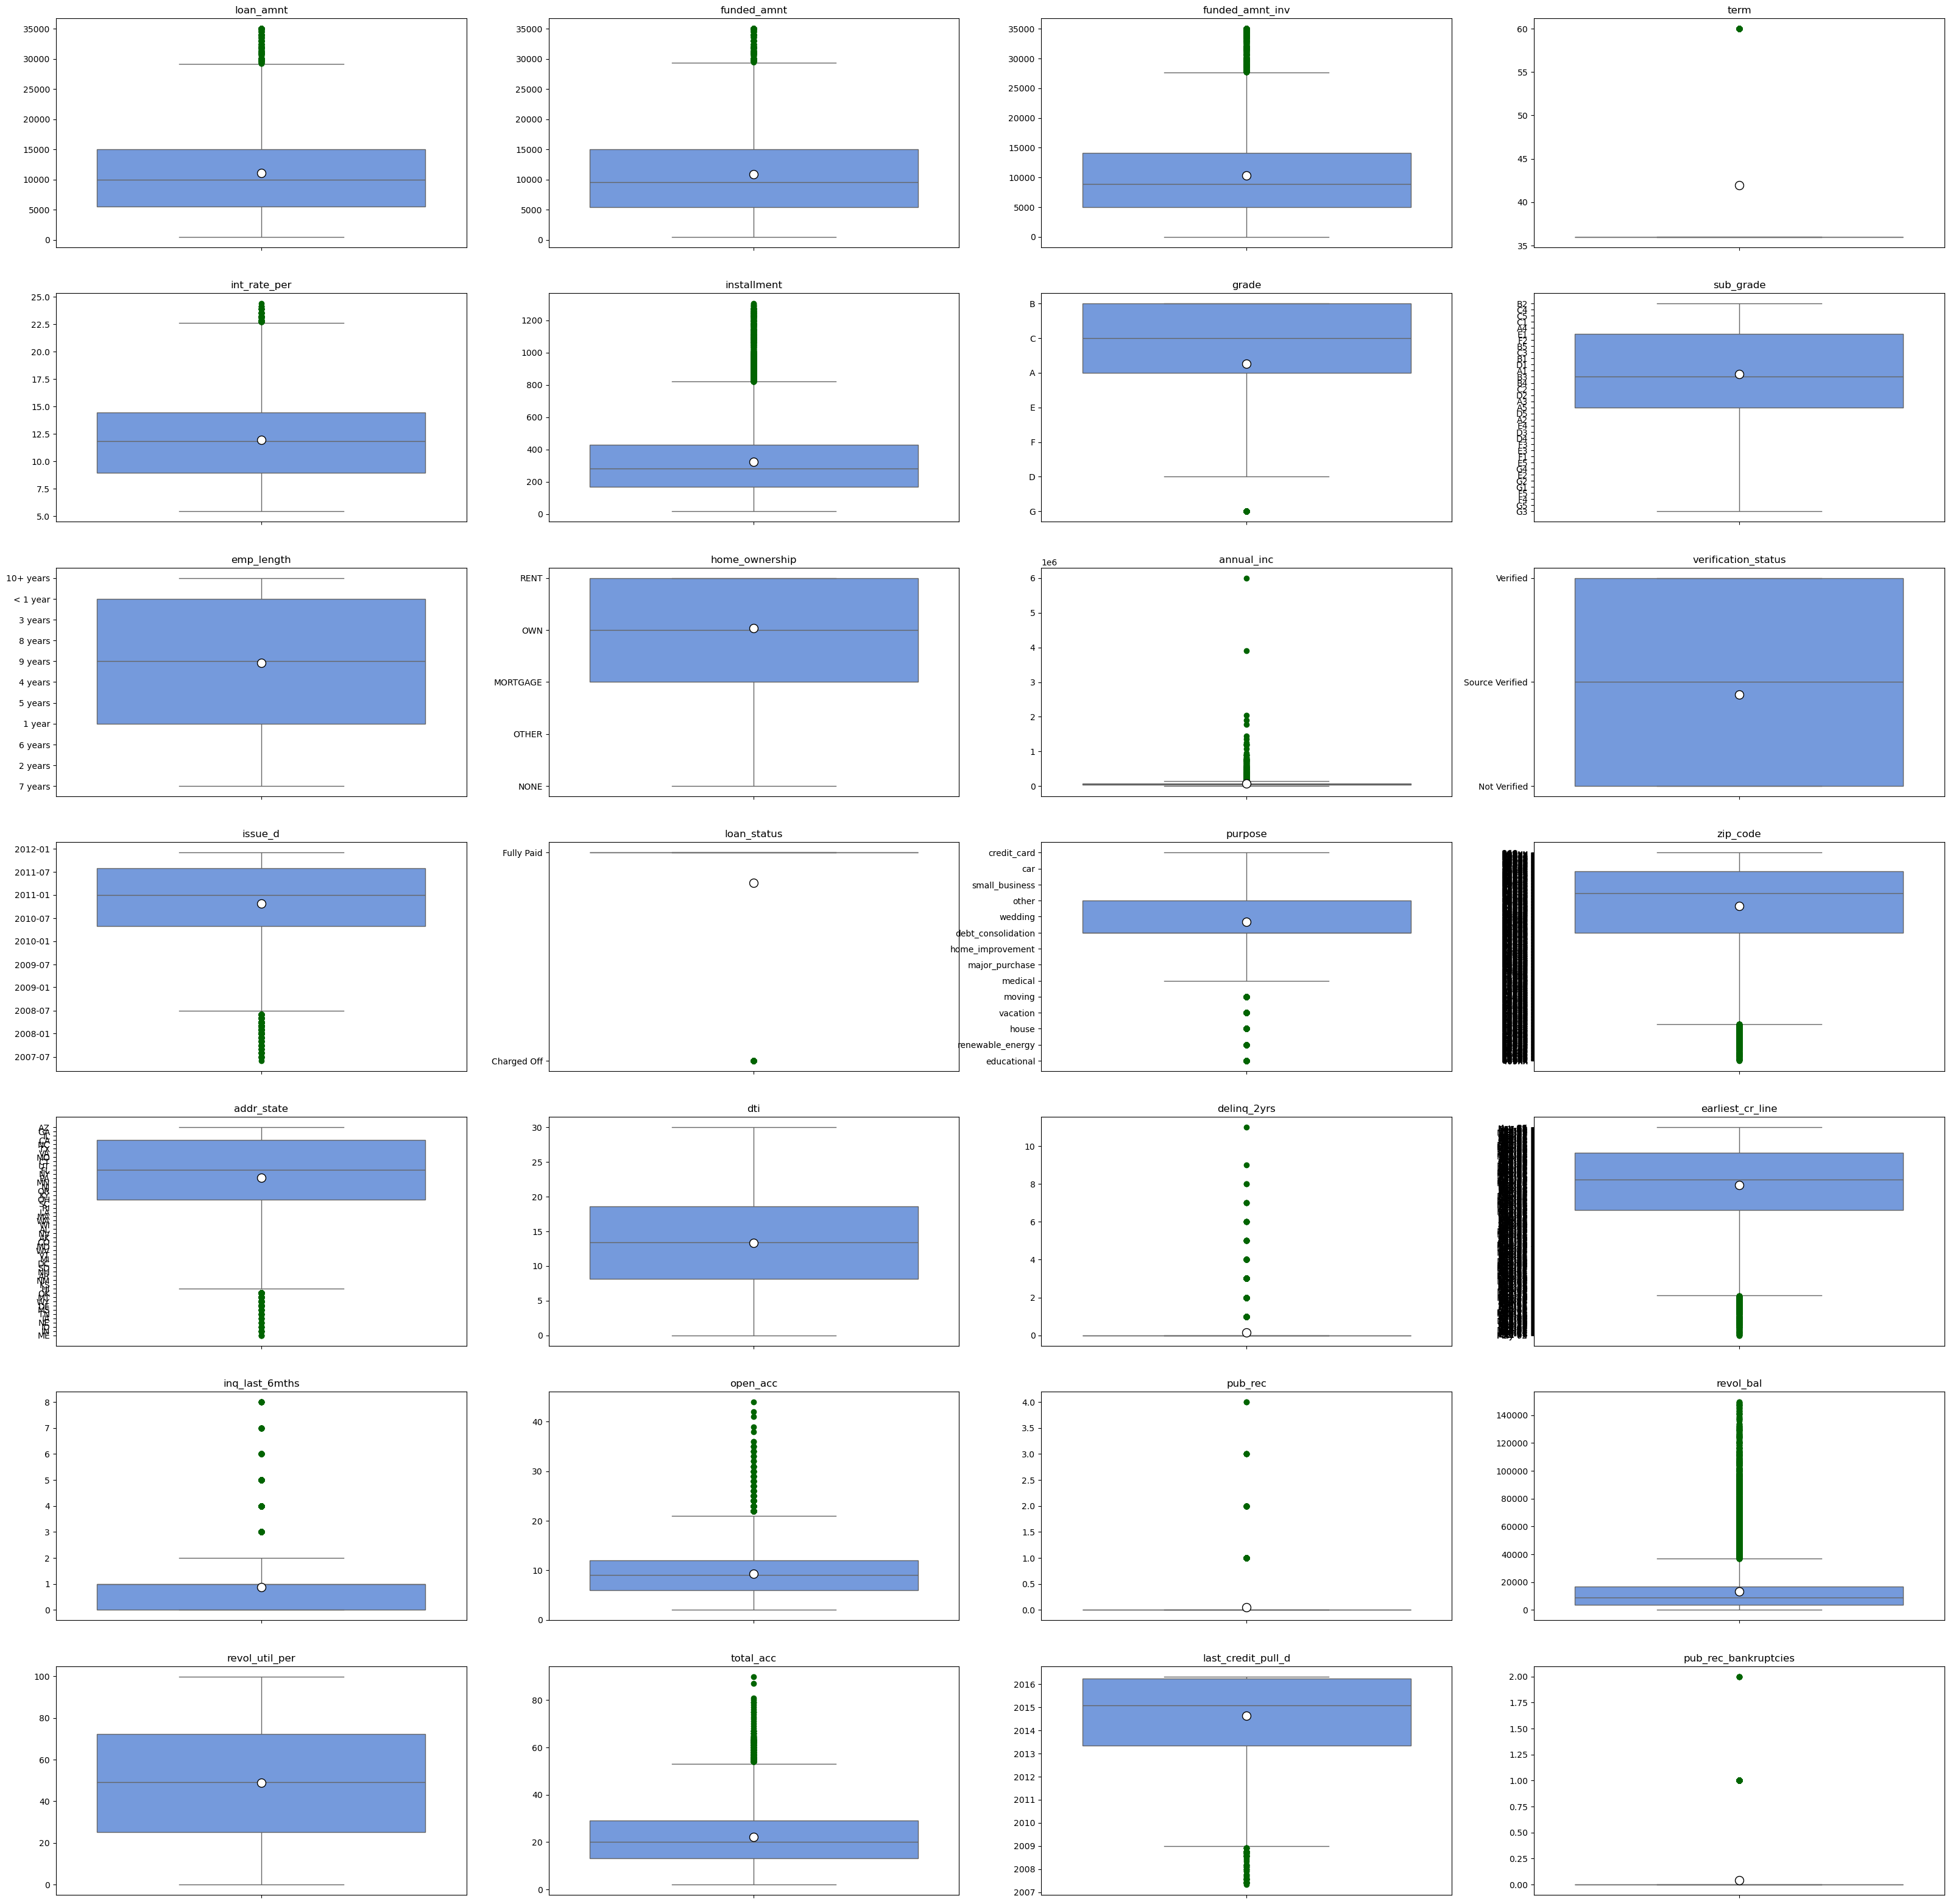

In [242]:
inputs = list(loan_data.columns) 

num_inputs = len(inputs)


fig, axs = plt.subplots(7, 4, figsize=(40,40))


for i, (ax, curve) in enumerate(zip(axs.flat, inputs)):
    sns.boxplot(y=loan_data[curve], ax=ax, color='cornflowerblue', showmeans=True,  
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},
           flierprops={'marker':'o', 
                      'markerfacecolor':'darkgreen',
                      'markeredgecolor':'darkgreen'})
    
    ax.set_title(inputs[i])
    ax.set_ylabel('')

Let's draw boxplot only for the continuous variables to see how to remove outliers.

In [243]:

df1 = loan_data[["loan_amnt","funded_amnt","funded_amnt_inv","int_rate_per","installment","annual_inc","delinq_2yrs","inq_last_6mths","open_acc","pub_rec","revol_bal","total_acc","pub_rec_bankruptcies","dti"]]


In [244]:
df1.shape

(37540, 14)

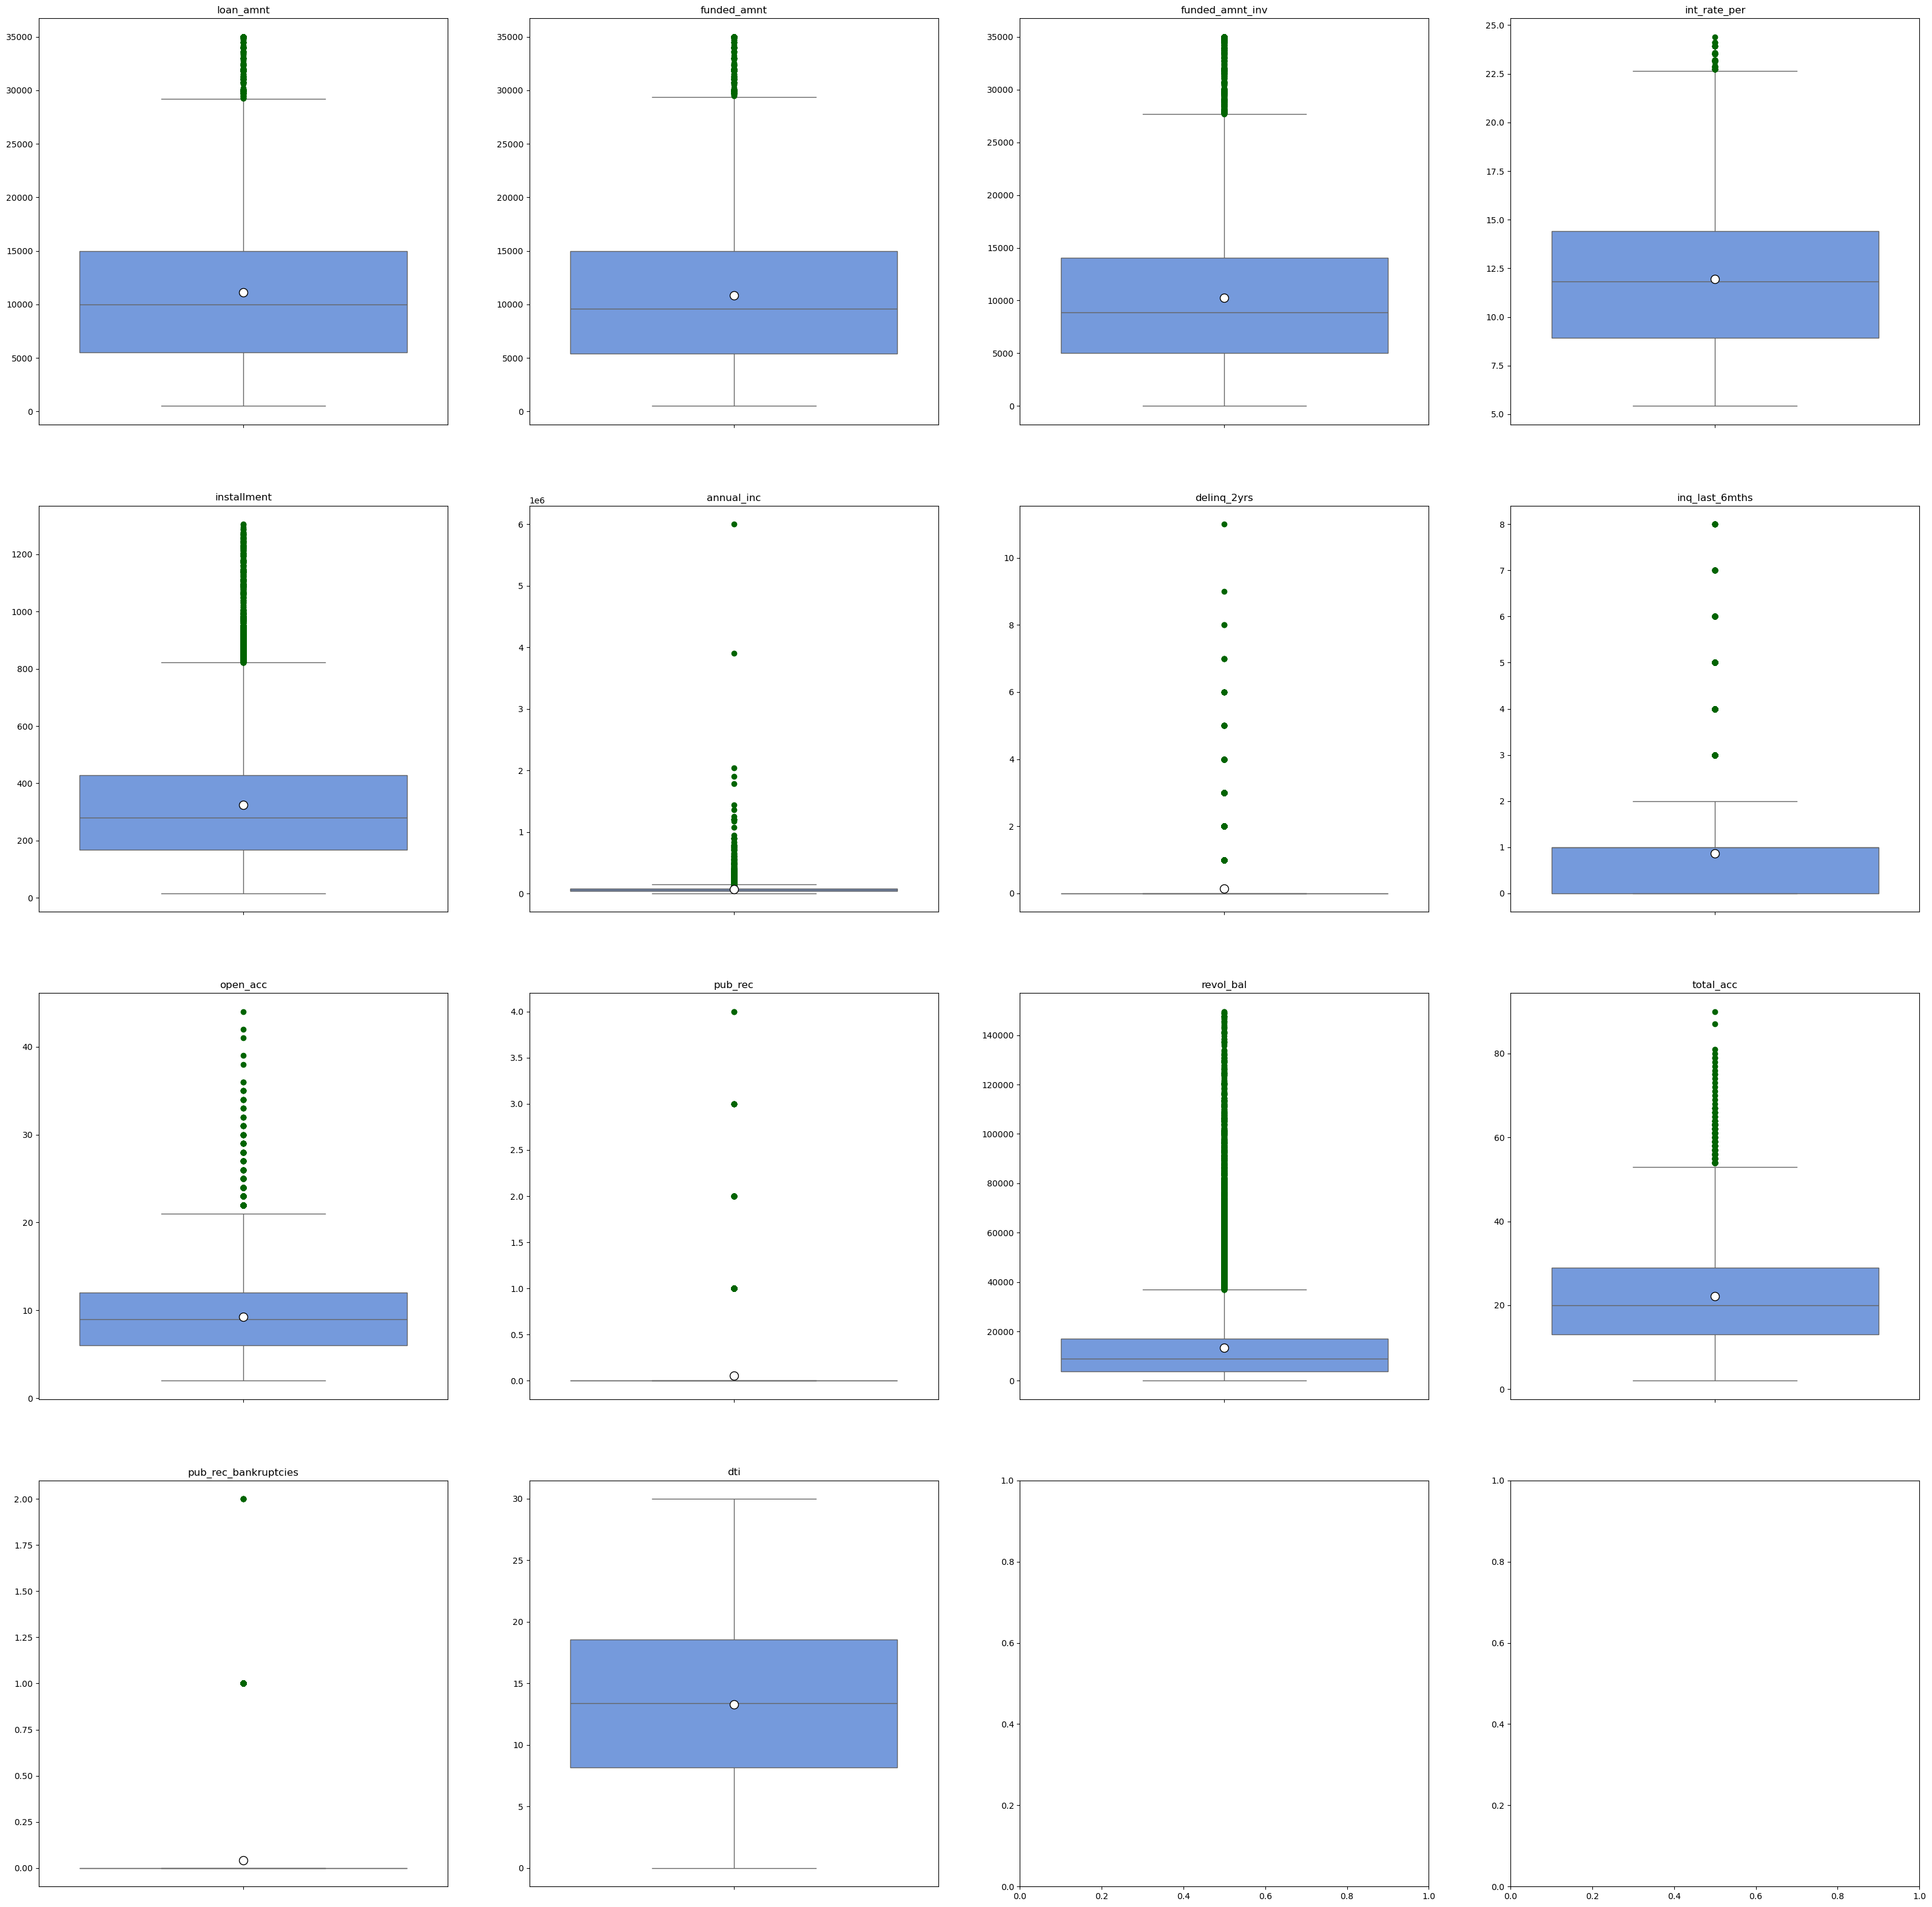

In [245]:
inputs = list(df1.columns) 

num_inputs = len(inputs)


fig, axs = plt.subplots(4, 4, figsize=(40,40))


for i, (ax, curve) in enumerate(zip(axs.flat, inputs)):
    sns.boxplot(y=df1[curve], ax=ax, color='cornflowerblue', showmeans=True,  
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},
           flierprops={'marker':'o', 
                      'markerfacecolor':'darkgreen',
                      'markeredgecolor':'darkgreen'})
    
    ax.set_title(inputs[i])
    ax.set_ylabel('')

In [246]:
df1[df1.pub_rec!=0].shape # there are very few rows with derogatory public records

(1951, 14)

Let's check if all the above loans were charged off

In [247]:
loan_data[loan_data.pub_rec!=0][["loan_status"]].value_counts()

loan_status
Fully Paid     1517
Charged Off     434
Name: count, dtype: int64

It's not true

In [248]:
# next var analysis - pub_rec_bankruptcies
loan_data[loan_data.pub_rec_bankruptcies!=0][["loan_status"]].value_counts()


loan_status
Fully Paid     1198
Charged Off     337
Name: count, dtype: int64

It's not true

In [249]:
# delinq_2yrs
loan_data[loan_data.delinq_2yrs!=0][["loan_status"]].value_counts()
#no this is not true

loan_status
Fully Paid     3428
Charged Off     662
Name: count, dtype: int64

In [250]:
loan_data.loan_amnt.max()

35000

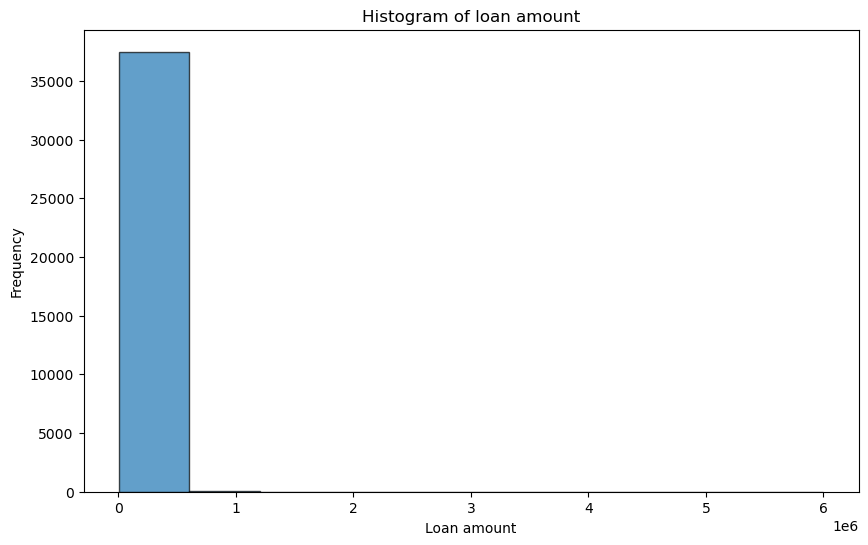

In [251]:
plt.figure(figsize=(10, 6))
plt.hist(loan_data.annual_inc, bins=10, edgecolor='k', alpha=0.7)
plt.title('Histogram of loan amount')
plt.xlabel('Loan amount')
plt.ylabel('Frequency')
plt.show()


<Axes: ylabel='annual_inc'>

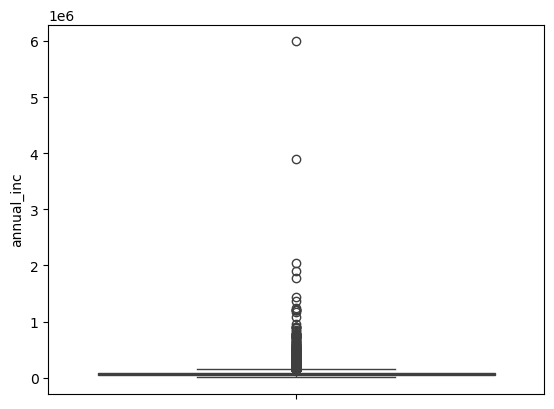

In [252]:
# above graph seems to be left skewed, but it is not very clear, we should draw a box plot to see the outliers
sns.boxplot(data = loan_data.annual_inc)

In [253]:
# now it is clear that there are a lot of outliers.
# let's see the loan_status for high annual income customers
loan_data[loan_data.annual_inc > 50000][["loan_status"]].value_counts()

loan_status
Fully Paid     19902
Charged Off     2960
Name: count, dtype: int64

Though few customers have a very high annual income, they have been charged off. This might be due to them having a high dti too. We can confirm this by drawing a box plot for dti. This should not have any outliers if our theory is true.

<Axes: ylabel='dti'>

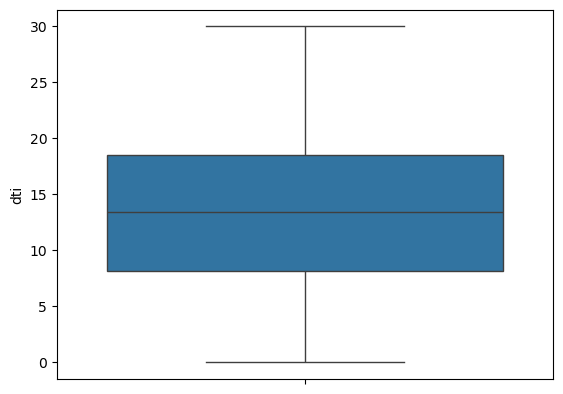

In [254]:
sns.boxplot(data=loan_data.dti)

There are no outliers. This confirms are previous observations

In [255]:
# returns the outliers for the given column
def getOutliers(df, columns):
    # calculate IQR for given column
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1

    # identify outliers
    threshold = 1.5
    outliers = df[ (df[columns] < Q1 - threshold * IQR) |(df[columns] > Q3 + threshold * IQR)]
    return outliers

In [256]:
#very high income value data will skew the representation. Remove these. 
loan_data = loan_data.drop(getOutliers(loan_data,'annual_inc').index)

In [257]:
loan_data.shape

(35810, 30)

In [258]:
#people having too many accounts will skew data. remove them. before removing, check if all of them are charged off
loan_data[loan_data.total_acc > 50][["loan_status"]].value_counts()

loan_status
Fully Paid     558
Charged Off     78
Name: count, dtype: int64

In [259]:
loan_data = loan_data[~(loan_data.total_acc > 50)]

In [260]:
# people having too many open accounts will skew data, drop these
loan_data[loan_data.open_acc > 18][["loan_status"]].value_counts()


loan_status
Fully Paid     805
Charged Off    157
Name: count, dtype: int64

In [261]:
loan_data = loan_data[~(loan_data.open_acc > 18)]

revol_bal has too many outliers.

In [262]:
loan_data = loan_data.drop(getOutliers(loan_data,'revol_bal').index)

Loan amount has too many outliers.

In [263]:
loan_data = loan_data.drop(getOutliers(loan_data,'loan_amnt').index)

Installment has too many outliers

In [264]:
loan_data = loan_data.drop(getOutliers(loan_data,'installment').index)

Funded_amnt_inv has too many outliers.

In [265]:
loan_data= loan_data.drop(getOutliers(loan_data,'funded_amnt_inv').index)

In [266]:
loan_data.shape

(30336, 30)

In [267]:
# with this, all outliers are treated by removing the corresponding rows.

## Univariate Analysis

Univariate analysis refers to the statistical examination of a single variable to summarize its main characteristics and understand its distribution. The goal is to describe and analyze the variable independently, without considering its relationship with other variables.

### Key Aspects of Univariate Analysis

- **Descriptive Statistics:** Includes measures such as mean, median, mode, variance, and standard deviation that summarize the central tendency, dispersion, and shape of the data distribution.

- **Frequency Distribution:** Represents the count of occurrences of each value or range of values in a dataset. It is often displayed using frequency tables or histograms.

- **Data Visualization:** Utilizes plots such as histograms, bar charts, and box plots to visually represent the distribution, patterns, and outliers of the variable.

- **Probability Distribution:** Describes the theoretical distribution of values for a variable, such as normal, binomial, or Poisson distributions.

- **Measures of Central Tendency:** Includes the mean (average), median (middle value), and mode (most frequent value) to identify the central point of the data.

- **Measures of Dispersion:** Includes range, variance, and standard deviation to describe the spread and variability of the data.

### Applications

- Summarizing and understanding the characteristics of a single variable.
- Identifying patterns, outliers, and trends within the variable.
- Providing foundational insights that inform further multivariate analysis.
- Assisting in data cleaning and preprocessing by detecting anomalies or inconsistencies.

Univariate analysis is a fundamental aspect of exploratory data analysis (EDA) and serves as a preliminary step in understanding individual variables before exploring their relationships with other variables.


# Let's Analyse House Ownership w.r.t the Loan Status

In [268]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

charged_off = loan_data[loan_data['loan_status'] == 'Charged Off']
fully_paid = loan_data[loan_data['loan_status'] == 'Fully Paid']


In [269]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate_per',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util_per', 'total_acc', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'issue_month', 'issue_year'],
      dtype='object')

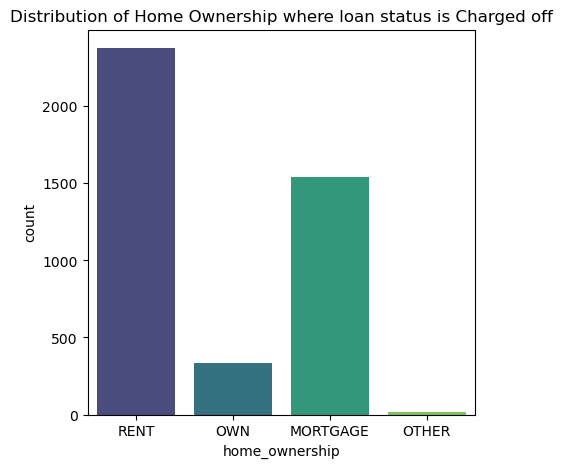

In [270]:
# Univariate Analysis for home_ownership in Charged-off Segment
plt.figure(figsize=(5, 5))
palette = 'viridis' 
sns.countplot(x='home_ownership', data=charged_off,palette=palette)
plt.title('Distribution of Home Ownership where loan status is Charged off')
plt.show()


Analysis: Number of defaults were high for applicants who were renting home

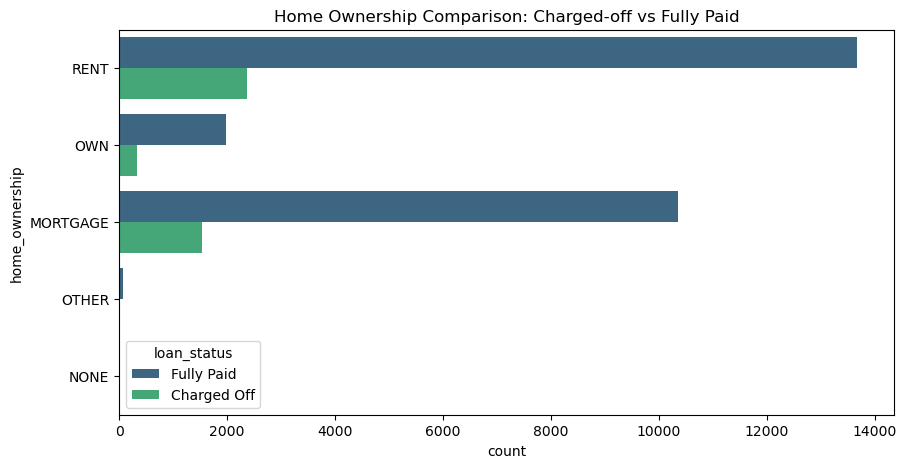

In [271]:
# Compare Home Ownership between Charged-off and Fully Paid Segments
plt.figure(figsize=(10, 5))
palette = 'viridis' 
sns.countplot(y='home_ownership', hue='loan_status', data=loan_data[loan_data['loan_status'].isin(['Charged Off', 'Fully Paid'])],palette=palette)
plt.title('Home Ownership Comparison: Charged-off vs Fully Paid')
plt.show()


In [272]:
# Create a contingency table for home_ownership and loan_status
contingency_table = pd.crosstab(loan_data['home_ownership'], loan_data['loan_status'])

# Perform Chi-square test
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

print(f"Chi-square Test Statistic: {chi2}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant association between home ownership and loan status.")
else:
    print("There is no significant association between home ownership and loan status.")


Chi-square Test Statistic: 21.265291298002545
P-value: 0.00028052990556637564
There is a significant association between home ownership and loan status.


Analysis: From the above plot we come across that the Applicants having house_ownership as 'RENT' has more probability of defaulting

# Let's analyse the purpose of applying loan 

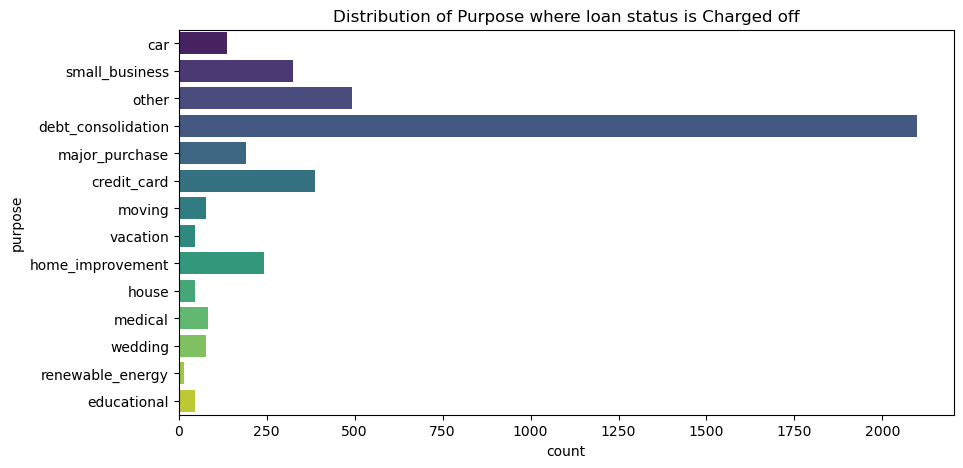

In [273]:
plt.figure(figsize=(10, 5))
palette = 'viridis' 
sns.countplot(y='purpose', data=charged_off,palette=palette)
plt.title('Distribution of Purpose where loan status is Charged off')
plt.show()


Analysis: From the above plot we come across that the Applicants  who use the loan to clear other debts are defaulters

# Let's Analyse Grade w.r.t Loan Status

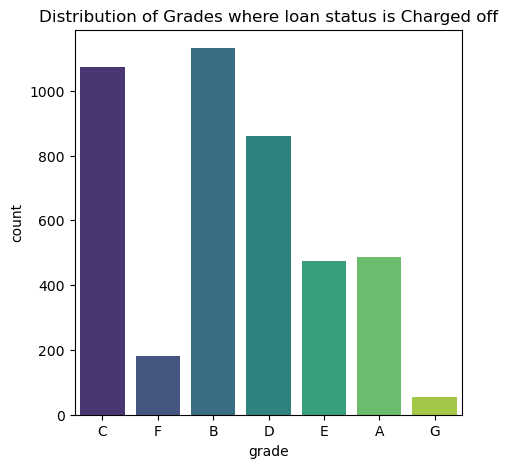

In [274]:
plt.figure(figsize=(5, 5))
palette = 'viridis' 
sns.countplot(x='grade', data=charged_off,palette=palette)
plt.title('Distribution of Grades where loan status is Charged off')
plt.show()


Analysis: From the above plot we come across that the Applicants  who falls in grade 'B' are mostly defaulters

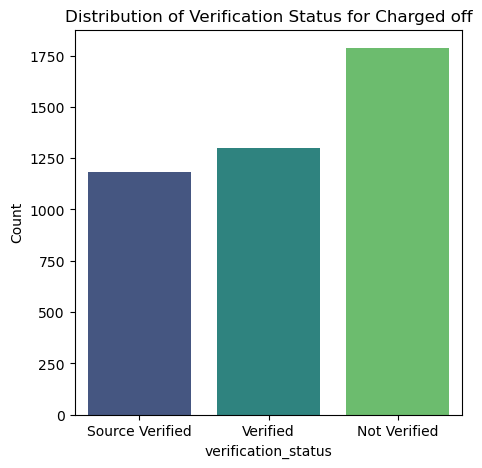

In [275]:
palette = 'viridis'
plt.figure(figsize=(5, 5))
sns.countplot(data=charged_off, x='verification_status',palette = palette )
plt.title('Distribution of Verification Status for Charged off')
plt.xlabel('verification_status')
plt.ylabel('Count')
plt.show()

Analysis: From the above plot we come across that the Applicants whose verification status is not verified are mostly defaulters

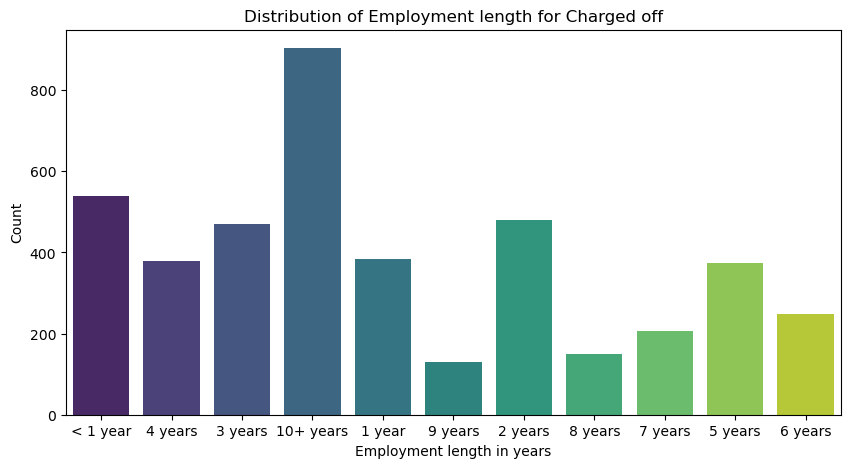

In [276]:
palette = 'viridis'
plt.figure(figsize=(10, 5))
sns.countplot(data=charged_off, x='emp_length',palette = palette )
plt.title('Distribution of Employment length for Charged off')
plt.xlabel('Employment length in years')
plt.ylabel('Count')
plt.show()

Analysis: On the basis of above plot the applicants whose employment length is 10+ years i.e maximum has high probability of defaulters

### Let's analyse loan_status based on month / year of loan approval

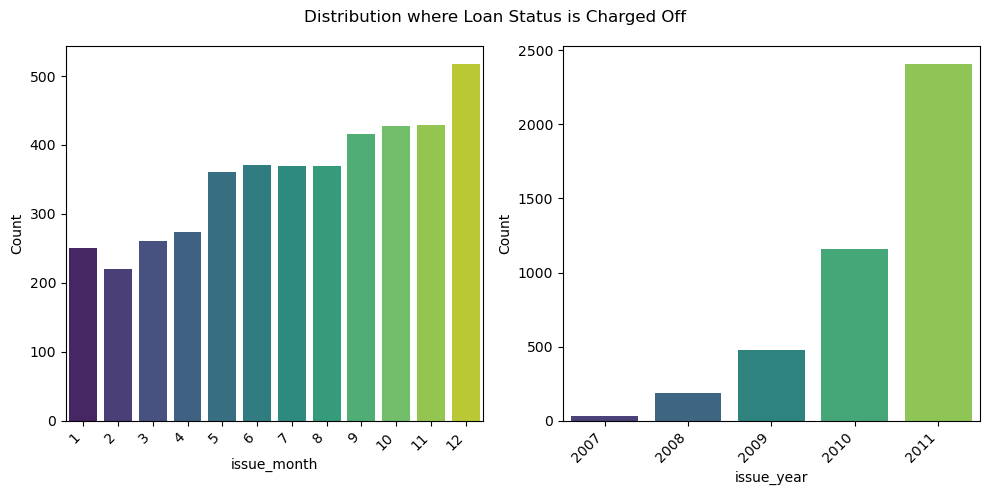

In [277]:
# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Define a color palette
palette = 'viridis' 

plt.suptitle('Distribution where Loan Status is Charged Off')

# Plot each column in a subplot
for ax, column in zip(axes.flatten(), ["issue_month","issue_year"]):
    sns.countplot(x=column, data=charged_off, ax=ax, palette=palette)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


plt.tight_layout()

Analysis: 
1. The first graph indicates that most defaults happened for loans issued in the month of december. 
2. the second graph indicates that the most defaults happened for the loans sactioned in the year 2011. It is likely linked to the financial crisis - black monday that caused a recession.


### Derived metrics 

Derived metrics help in better undarstanding of the data, by adding columns derived from the existing columns.
We are creating bins for int_rate,open_acc,revol_util,total_acc

In [278]:
loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate_per'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_data['open_acc_groups'] = pd.cut(loan_data['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan_data['revol_util_groups'] = pd.cut(loan_data['revol_util_per'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan_data['total_acc_groups'] = pd.cut(loan_data['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [279]:
charged_off = loan_data[loan_data['loan_status'] == 'Charged Off']


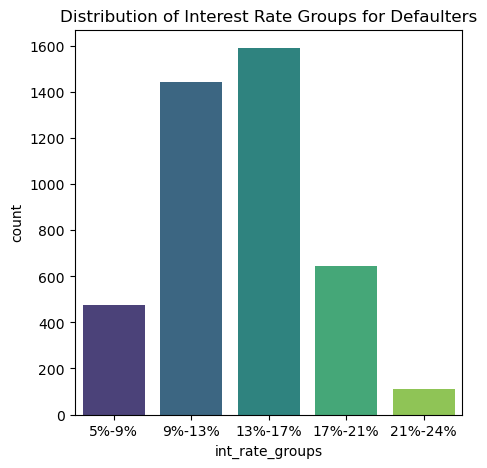

In [280]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure
plt.figure(figsize=(5, 5))

# Define a color palette
palette = 'viridis'  # You can choose any seaborn color palette or pass a list of colors

# Plot with color
sns.countplot(x='int_rate_groups', data=charged_off, palette=palette)

# Add a title
plt.title('Distribution of Interest Rate Groups for Defaulters')

# Show the plot
plt.show()


Analysis: Applicants who receive interest at the rate of 13-17% are more defaulters in comparison to other buckets


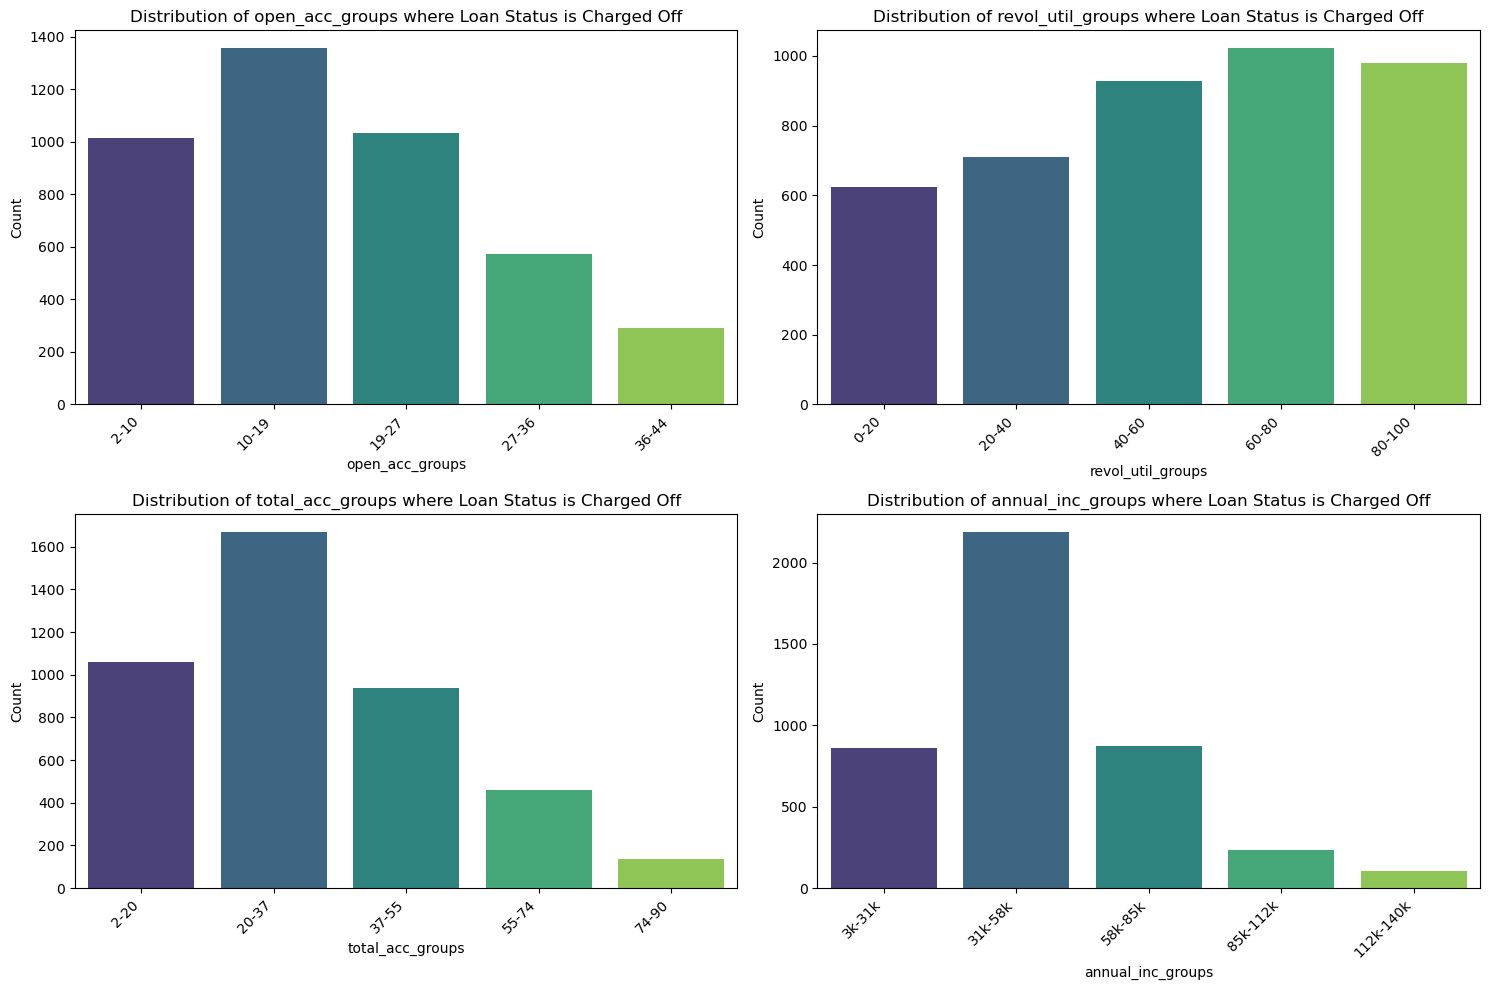

In [281]:


columns_to_plot = ['open_acc_groups', 'revol_util_groups', 'total_acc_groups', 'annual_inc_groups']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Define a color palette
palette = 'viridis'  # You can choose any seaborn color palette or pass a list of colors

# Plot each column in a subplot
for ax, column in zip(axes.flatten(), columns_to_plot):
    sns.countplot(x=column, data=charged_off, ax=ax, palette=palette)
    ax.set_title(f'Distribution of {column} where Loan Status is Charged Off')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()


From the above **analysis**, we came across that applicants are defaulters when:

- The number of open credit lines in the borrower's credit file is in the range between **10-19**.
- The amount of credit the borrower is using relative to all available revolving credit is **60-80**.
- The total number of credit lines currently in the borrower's credit file is **20-37**.
- The total amount of income range is **31,000-58,000**.


# Segmented Univariate Analysis by Loan Status

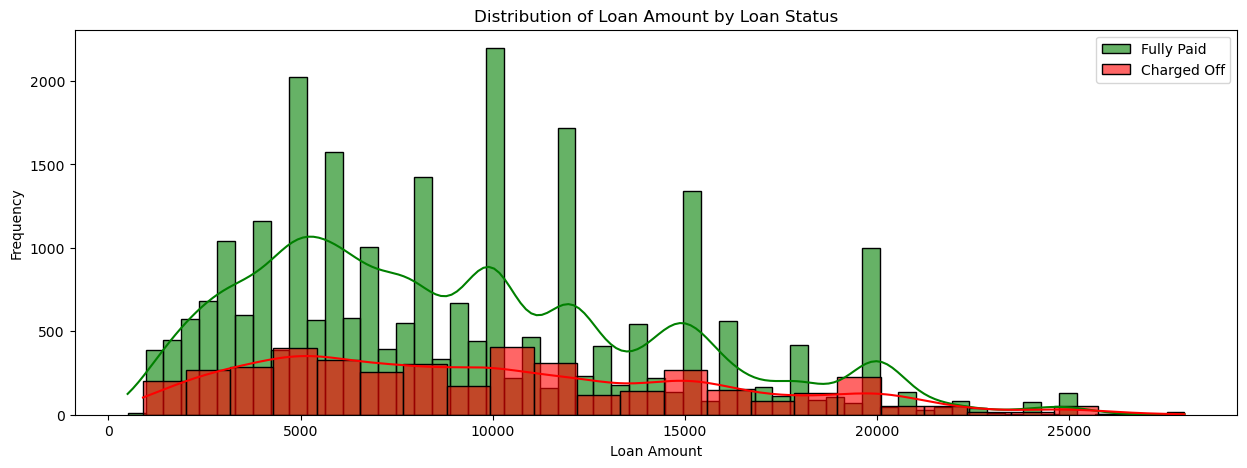

In [282]:
# Load and clean data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loan_data = loan_data.dropna()

# Segmentation
fully_paid = loan_data[loan_data['loan_status'] == 'Fully Paid']
charged_off = loan_data[loan_data['loan_status'] == 'Charged Off']

# Plot loan_amount distribution for each loan status
plt.figure(figsize=(15, 5))
sns.histplot(fully_paid['loan_amnt'], kde=True, color='green', label='Fully Paid', alpha=0.6)
sns.histplot(charged_off['loan_amnt'], kde=True, color='red', label='Charged Off', alpha=0.6)
plt.title('Distribution of Loan Amount by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()


On above analysis we came across that the more the loan amount the high the probability of the applicants getting  charged off.Also we can see that the proportion of fully paid applicants is more than that of applicants w/ charged off.

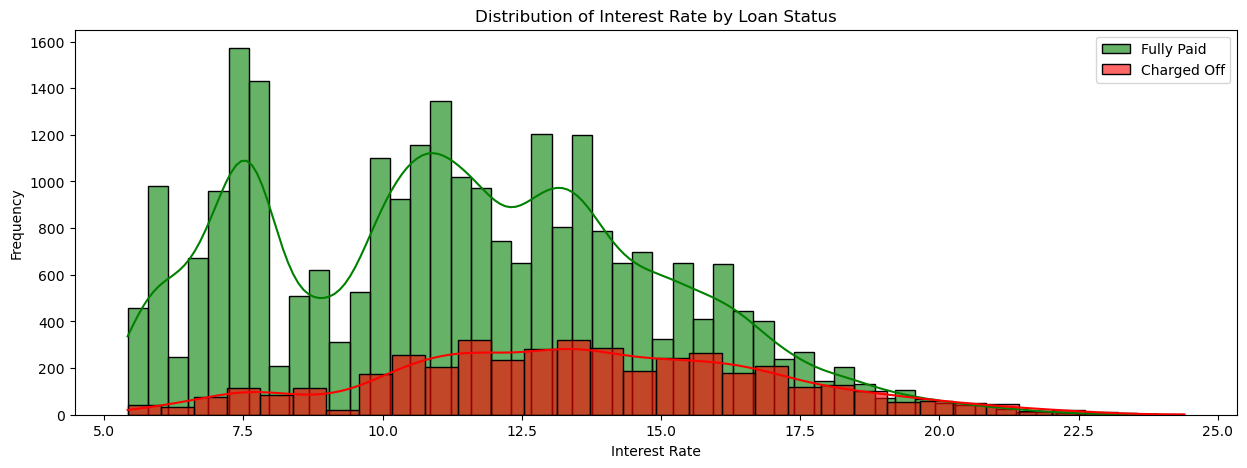

In [283]:
# Plot interest rate distribution for each loan status
plt.figure(figsize=(15, 5))
sns.histplot(fully_paid['int_rate_per'], kde=True, color='green', label='Fully Paid', alpha=0.6)
sns.histplot(charged_off['int_rate_per'], kde=True, color='red', label='Charged Off', alpha=0.6)
plt.title('Distribution of Interest Rate by Loan Status')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.legend()
plt.show()


On the above analysis we can see that the fully paid applicants have less Interest rate comparitively than that of applicants w/ charged off loans.In nutshell lesser the interest more the applicants able to pay loans than that of high interest rates.

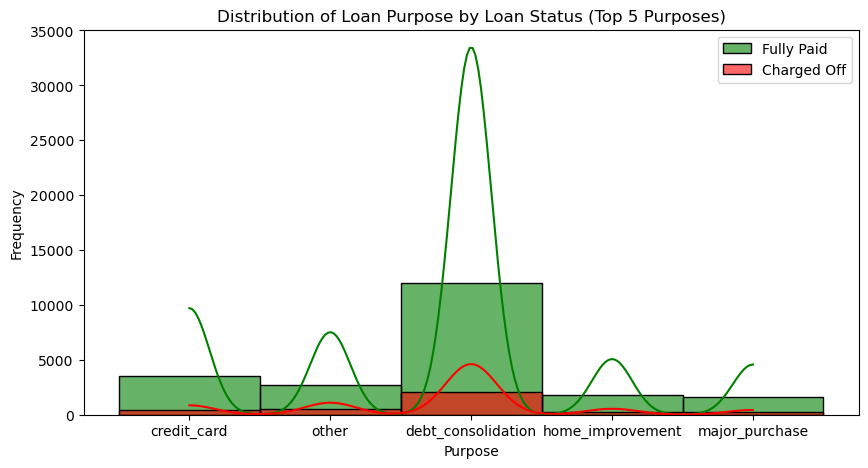

In [284]:
# Plot interest rate distribution for different loan purposes
# Plot interest rate distribution for each loan status
import matplotlib.pyplot as plt
import seaborn as sns

# Count frequencies of each purpose and get the top 5
top_5_purposes = fully_paid['purpose'].value_counts().nlargest(5).index

# Filter data to include only the top 5 purposes
fully_paid_top5 = fully_paid[fully_paid['purpose'].isin(top_5_purposes)]
charged_off_top5 = charged_off[charged_off['purpose'].isin(top_5_purposes)]

# Plotting
plt.figure(figsize=(10, 5))
sns.histplot(fully_paid_top5['purpose'], kde=True, color='green', label='Fully Paid', alpha=0.6)
sns.histplot(charged_off_top5['purpose'], kde=True, color='red', label='Charged Off', alpha=0.6)
plt.title('Distribution of Loan Purpose by Loan Status (Top 5 Purposes)')
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.legend()
plt.show()




On above bar graph we can analyse that the sole purpose to apply for loan of the applicants with charged off loans is to close any existing debt.Though the proportion is more for fully paid applicants as well but there are chances that the latter can have multiple purposes which have higher in ratio than the former.

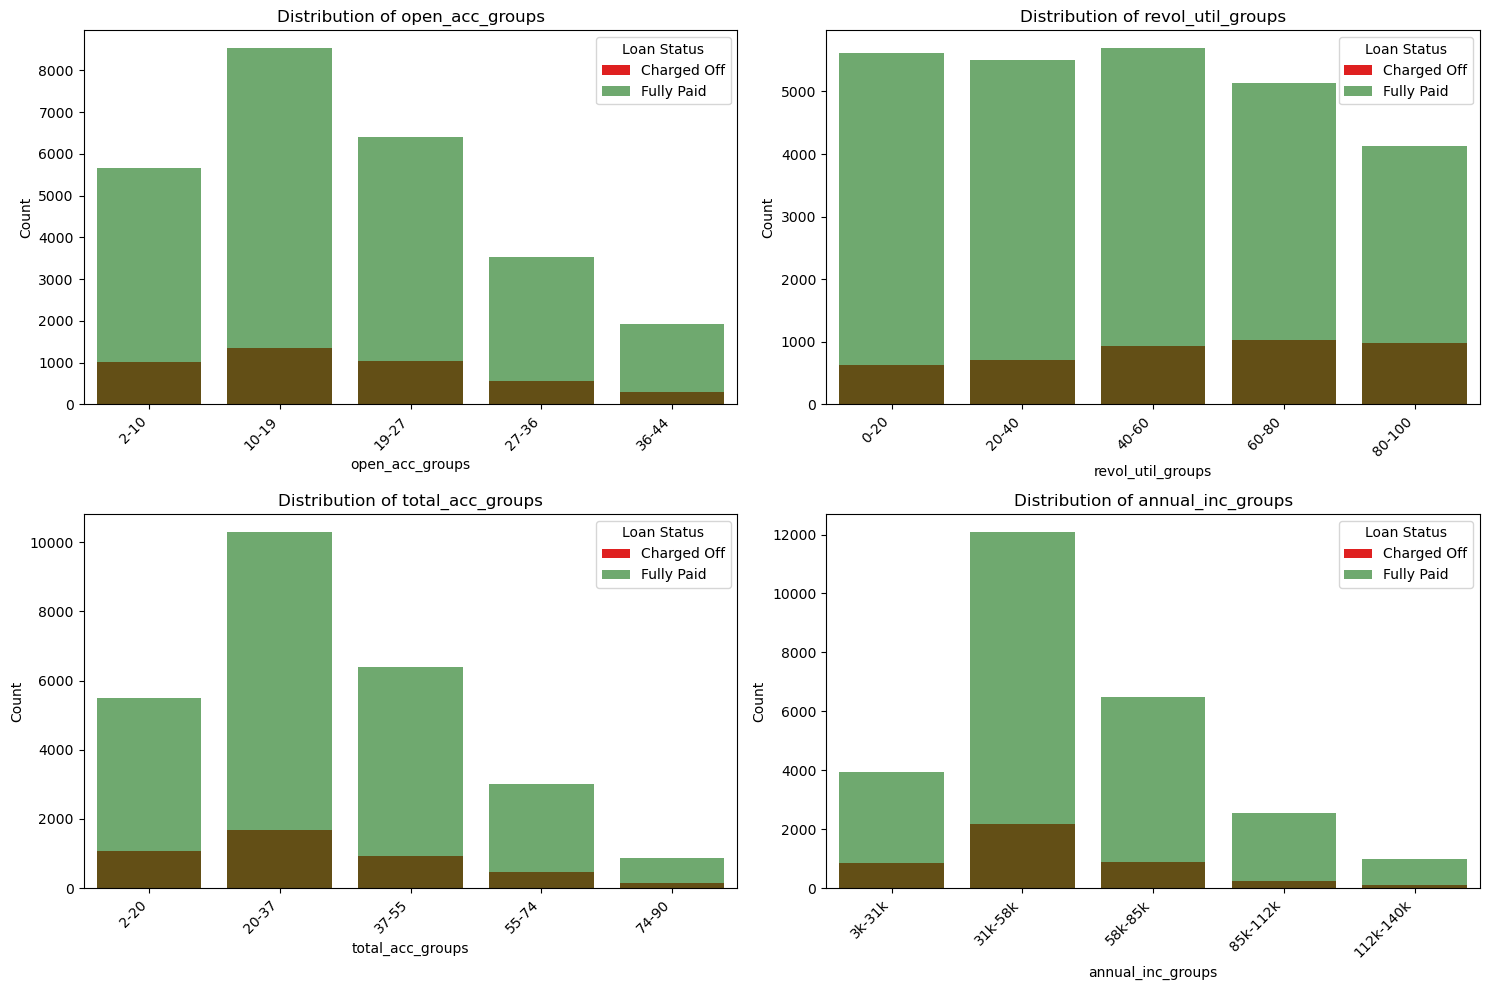

In [285]:
charged_off = loan_data[loan_data['loan_status'] == 'Charged Off']
fully_paid = loan_data[loan_data['loan_status'] == 'Fully Paid']
columns_to_plot = ['open_acc_groups', 'revol_util_groups', 'total_acc_groups', 'annual_inc_groups']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot each column in a subplot
for ax, column in zip(axes.flatten(), columns_to_plot):
    sns.countplot(x=column, data=charged_off, ax=ax, color='red', label='Charged Off')
    sns.countplot(x=column, data=fully_paid, ax=ax, color='green', label='Fully Paid', alpha=0.6)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.legend(title='Loan Status')

# Adjust layout
plt.tight_layout()
plt.show()


From the above **analysis**, we came across that applicants who are defaulters & fully paid when:

- The number of open credit lines in the borrower's credit file is in the range between **10-19**.
- The amount of credit the borrower is using relative to all available revolving credit is **60-80** for defaulters and **40-60** for fully paid    applicants.
- The total number of credit lines currently in the borrower's credit file is **20-37**.
- The total amount of income range is **31,000-58,000**.


## Bivariate Analysis

Bivariate analysis refers to the statistical analysis of two variables to understand the relationship between them. The goal is to explore how one variable affects or is related to another. This type of analysis can reveal patterns, correlations, or associations and is often used to understand dependencies and causal relationships.

### Key Aspects of Bivariate Analysis

- **Correlation:** Measures the strength and direction of the linear relationship between two variables. For example, Pearson's correlation coefficient quantifies this relationship on a scale from -1 to 1.

- **Regression Analysis:** Explores the relationship between a dependent variable and one or more independent variables. Linear regression is a common technique used to model this relationship and predict values.

- **Cross-tabulation:** A method of summarizing data into a table that shows the frequency distribution of variables. It helps in understanding the relationship between categorical variables.

- **Scatter Plots:** Visual representations that display the relationship between two continuous variables. They help in identifying trends, clusters, and outliers.

- **Chi-Square Tests:** Used to determine if there is a significant association between two categorical variables.

- **T-tests and ANOVA:** These tests compare means between groups and assess whether the differences are statistically significant. T-tests are used for two groups, while ANOVA is used for three or more.

### Applications

- Identifying patterns or trends in data.
- Understanding dependencies between variables.
- Informing decision-making based on relationships between factors.
- Predicting outcomes based on observed relationships.

Bivariate analysis is a fundamental step in exploratory data analysis (EDA) and helps in forming hypotheses and guiding further analysis.


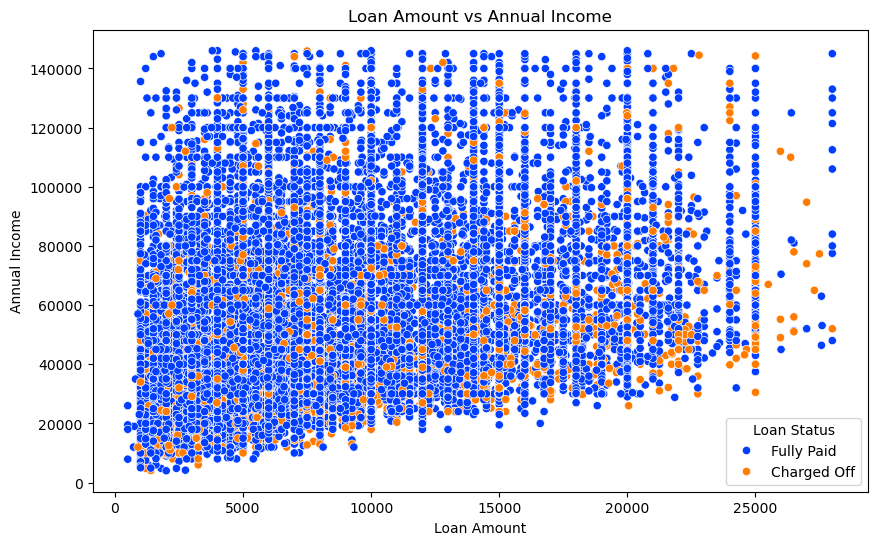

In [286]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot with a legend for loan status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=loan_data, x='loan_amnt', y='annual_inc', hue='loan_status', palette='bright')

# Add title and labels
plt.title('Loan Amount vs Annual Income')
plt.xlabel('Loan Amount')
plt.ylabel('Annual Income')

# Show the plot with legend
plt.legend(title='Loan Status')
plt.show()


Analysis: In the scatter plot above, it is evident that applicants with lower annual incomes tend to have higher loan amounts and a higher likelihood of defaulting.

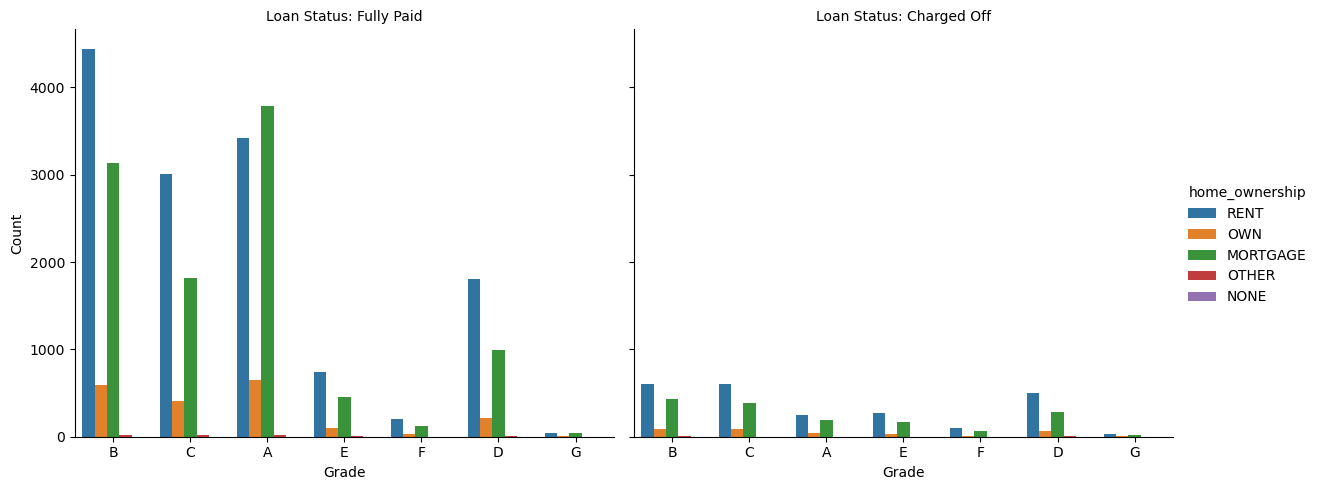

In [287]:
g = sns.catplot(x='grade', hue='home_ownership', col='loan_status', data=loan_data, kind='count', height=5, aspect=1.2)
g.set_titles('Loan Status: {col_name}')
g.set_axis_labels('Grade', 'Count')

# Show the plot
plt.show()



Analysis: In the above plot we can see that applicants who have rented houses are charged off as well as fully paid.Also, grade B has more applicants who are charged off and fully paid loans

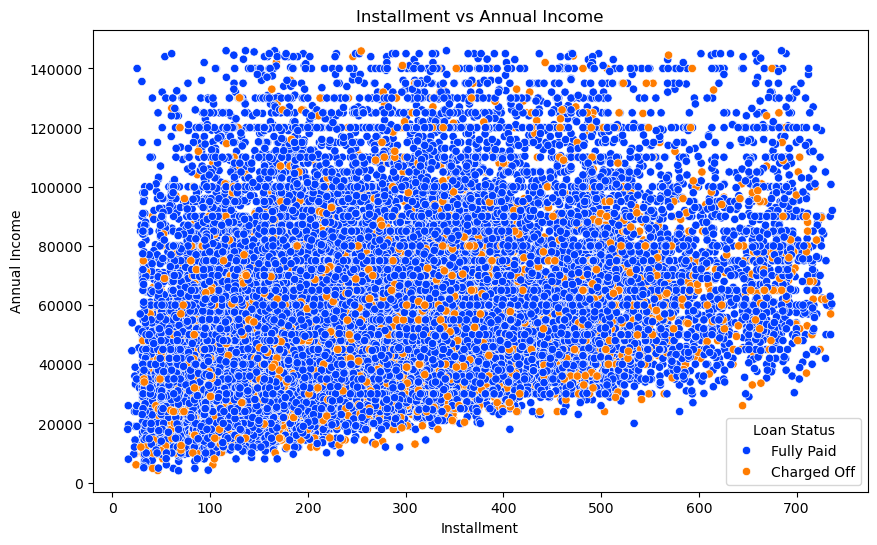

In [288]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=loan_data, x='installment', y='annual_inc', hue='loan_status', palette='bright')

plt.title('Installment vs Annual Income')
plt.xlabel('Installment')
plt.ylabel('Annual Income')
plt.legend(title='Loan Status')
plt.show()


Analysis: In the above plot we come across that the applicants with lesser installment and more annual income has loan status as fully paid and the charged off applicants has less annual income and the installment seems to be more 

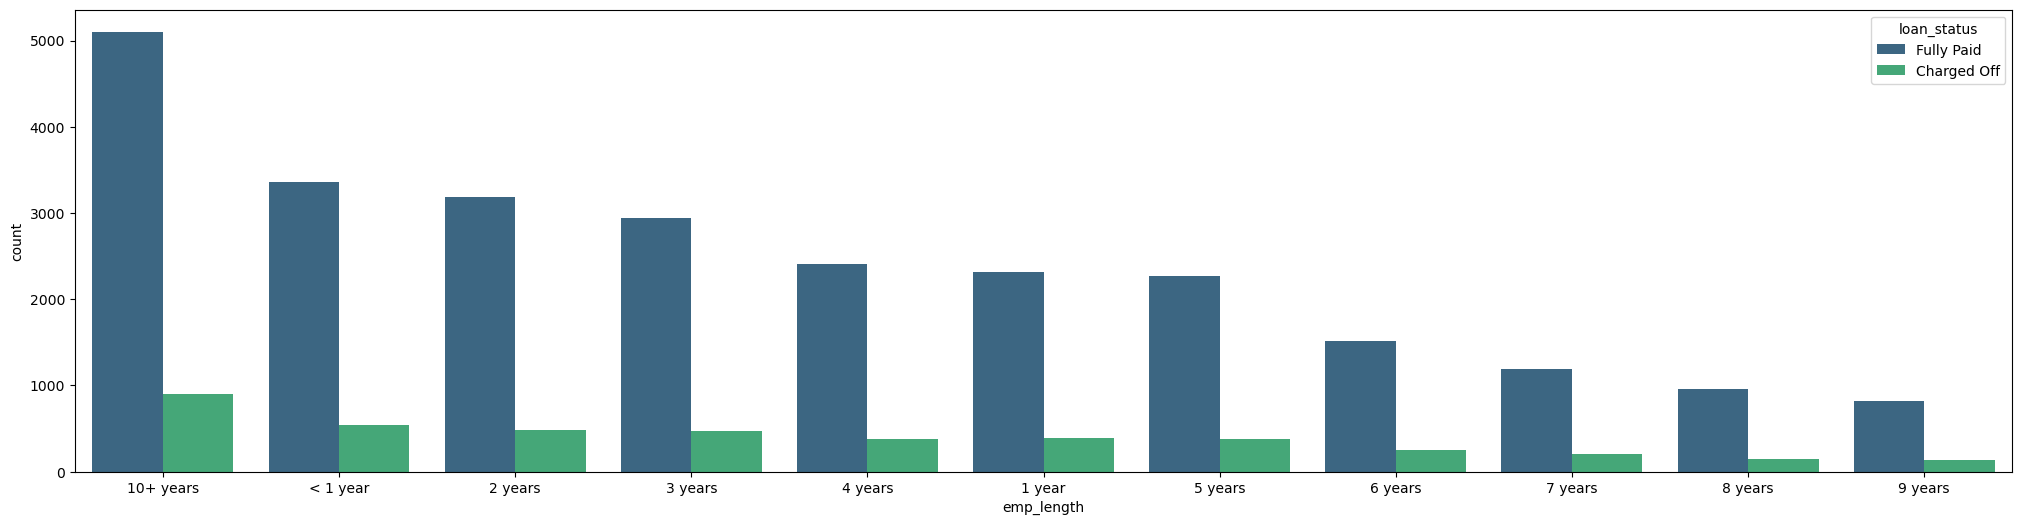

In [289]:
desc_order=loan_data['emp_length'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(25, 6))
sns.countplot(x='emp_length', hue='loan_status', data=loan_data,order=desc_order.index,palette=palette)
plt.show()

Analysis: The employees with more than 10+ years of service are mostly the applicants of loan

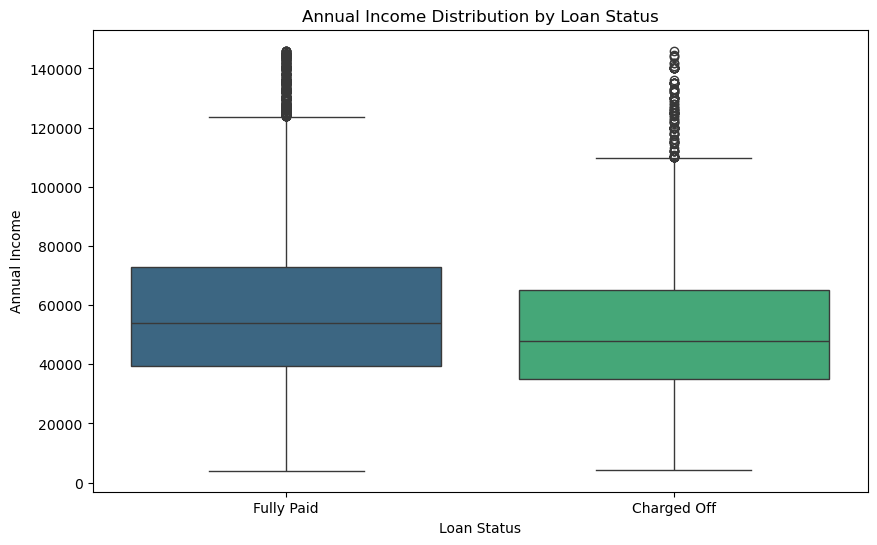

In [290]:
import matplotlib.pyplot as plt
import seaborn as sns

desc_order = loan_data['loan_status'].value_counts().sort_values(ascending=False).index

palette = 'viridis'  


plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=loan_data, order=desc_order, palette=palette)

plt.title('Annual Income Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')

plt.show()


Analysis: In the above analysis came across a fact that applicants with more annual income has high probability of paying the loans

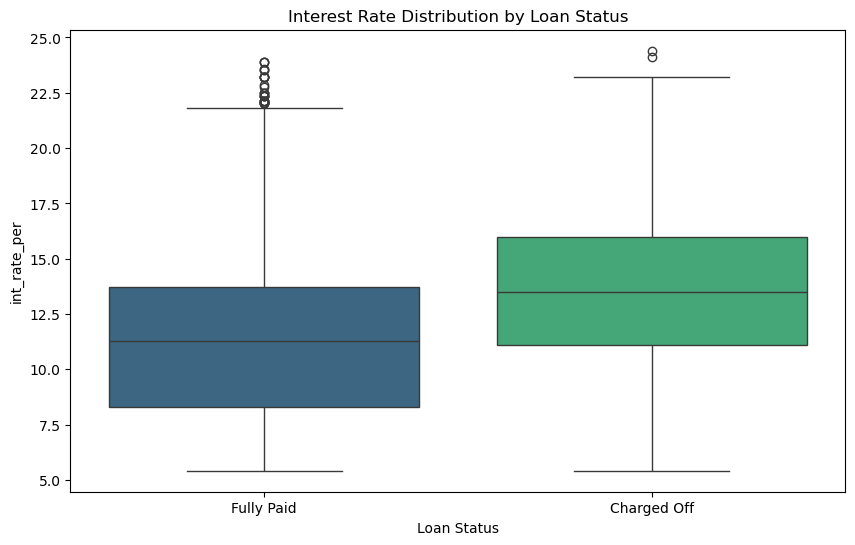

In [291]:
import matplotlib.pyplot as plt
import seaborn as sns

desc_order = loan_data['loan_status'].value_counts().sort_values(ascending=False).index

palette = 'viridis'  


plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='int_rate_per', data=loan_data, order=desc_order, palette=palette)

plt.title('Interest Rate Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('int_rate_per')

plt.show()

Analysis: In the above analysis come across a fact that applicants with less interest has high probability of paying the loans and the applicants who obtain loans at higher interest rates most likely default

<Figure size 2500x600 with 0 Axes>

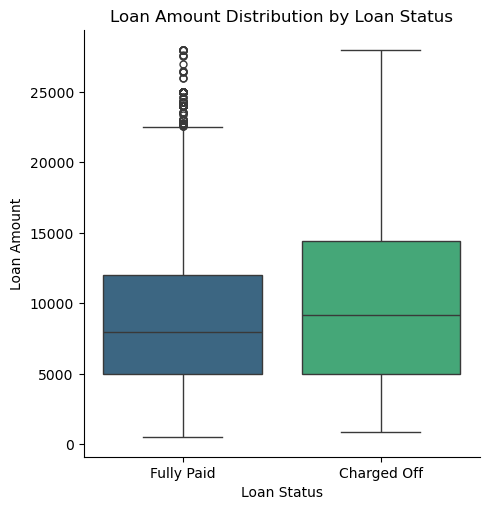

In [292]:
import matplotlib.pyplot as plt
import seaborn as sns

desc_order = loan_data['loan_status'].value_counts().sort_values(ascending=False).index

palette = 'viridis'  


plt.figure(figsize=(25, 6))
sns.catplot(x='loan_status', y='loan_amnt', data=loan_data, order=desc_order, palette=palette, kind = 'box')

plt.title('Loan Amount Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')

plt.show()

Analysis: More the loan amount high probability of applicants to get charged off

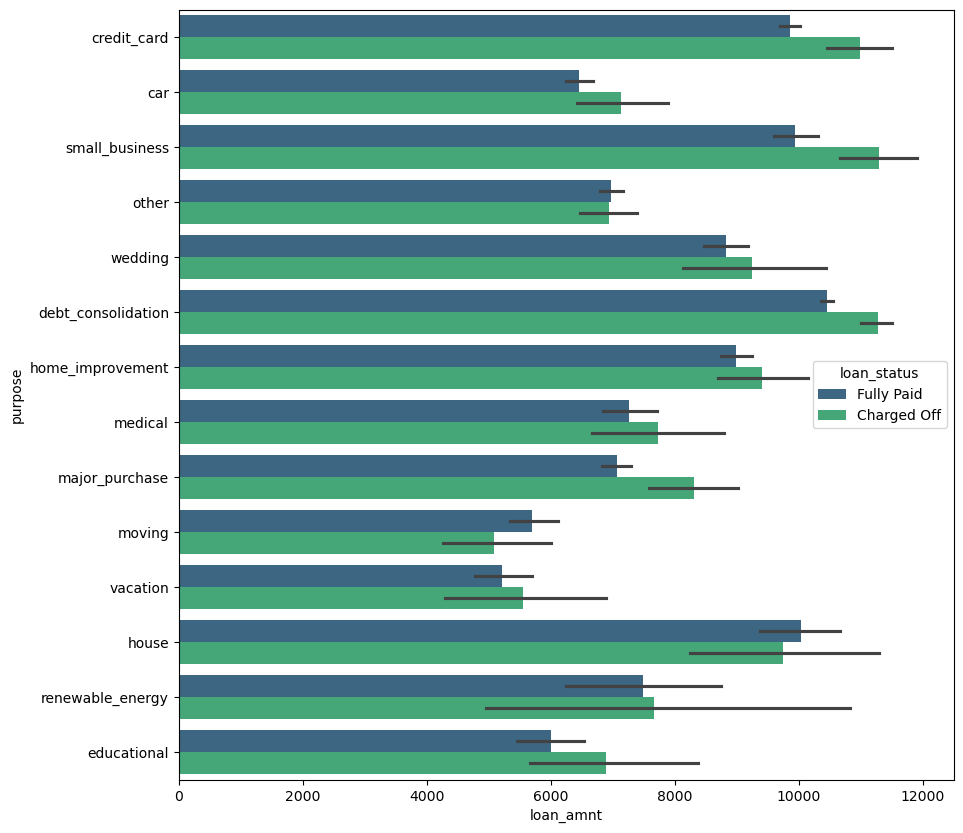

In [293]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='purpose', hue ='loan_status',palette=palette)
plt.show()

Analysis: The applicants are applying for loans most to pay their loans

In [294]:
# Creating a derived metric - Is_Default & Is_Not_Default => this will help in applying aggregate function on the
# target variable
loan_data["Is_Default"] = loan_data.loan_status == "Charged Off"
loan_data["Is_Not_Default"] = loan_data.loan_status == "Fully Paid"


<Axes: xlabel='Percentage_Default', ylabel='addr_state'>

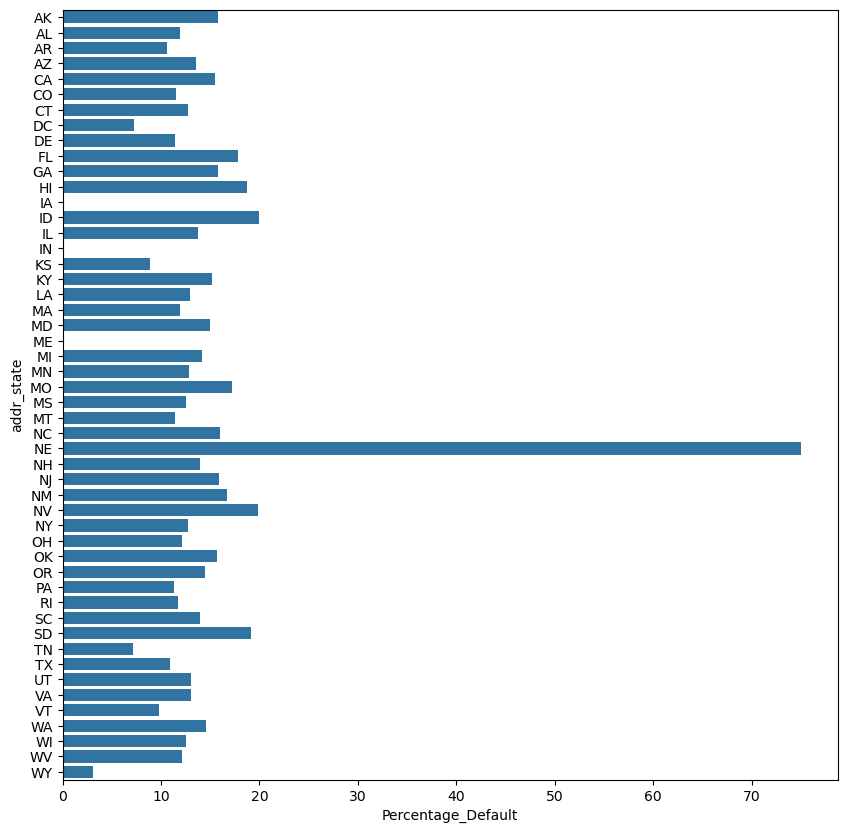

In [295]:
plt.figure(figsize=(10,10))
temp_df = loan_data.groupby(['addr_state'])[["Is_Default","Is_Not_Default"]].sum()
temp_df["Percentage_Default"] = 100 * temp_df.Is_Default/(temp_df.Is_Default+temp_df.Is_Not_Default)
temp_df.Percentage_Default.sort_values(ascending=False).nlargest(5)

sns.barplot(data = temp_df, y = "addr_state", x = "Percentage_Default")

In [296]:
temp_df.head()

Is_Default  Is_Not_Default  Percentage_Default
addr_state                                                
AK                   9              48           15.789474
AL                  40             295           11.940299
AR                  21             177           10.606061
AZ                  90             576           13.513514
CA                 854            4665           15.473818

Analysis: Loans taken by borrowers from state NE have the highest rate of defaults.
Here we created derived metrics in order to calculate the percentage defaults across states. This metric is essential to derived since it gives any idea that borrowers from state NE default the most and extra caution must be taken to give them loans.

In [297]:
loan_data.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate_per  installment  \
0       5000         5000           4975.0    36         10.65       162.87   
1       2500         2500           2500.0    60         15.27        59.83   
2       2400         2400           2400.0    36         15.96        84.33   
3      10000        10000          10000.0    36         13.49       339.31   
5       5000         5000           5000.0    36          7.90       156.46   

  grade sub_grade emp_length home_ownership  ...  pub_rec_bankruptcies  \
0     B        B2  10+ years           RENT  ...                     0   
1     C        C4   < 1 year           RENT  ...                     0   
2     C        C5  10+ years           RENT  ...                     0   
3     C        C1  10+ years           RENT  ...                     0   
5     A        A4    3 years           RENT  ...                     0   

  issue_month issue_year int_rate_groups open_acc_groups revol_util_groups  \
0          12       2011          9%-13%            2-10            80-100   
1          12       2011         13%-17%            2-10              0-20   
2          12       2011         13%-17%            2-10            80-100   
3          12       2011         13%-17%           19-27             20-40   
5          12       2011           5%-9%           19-27             20-40   

  total_acc_groups  annual_inc_groups  Is_Default Is_Not_Default  
0             2-20             3k-31k       False           True  
1             2-20             3k-31k        True          False  
2             2-20             3k-31k       False           True  
3            55-74            31k-58k       False           True  
5            20-37            31k-58k       False           True  

[5 rows x 37 columns]

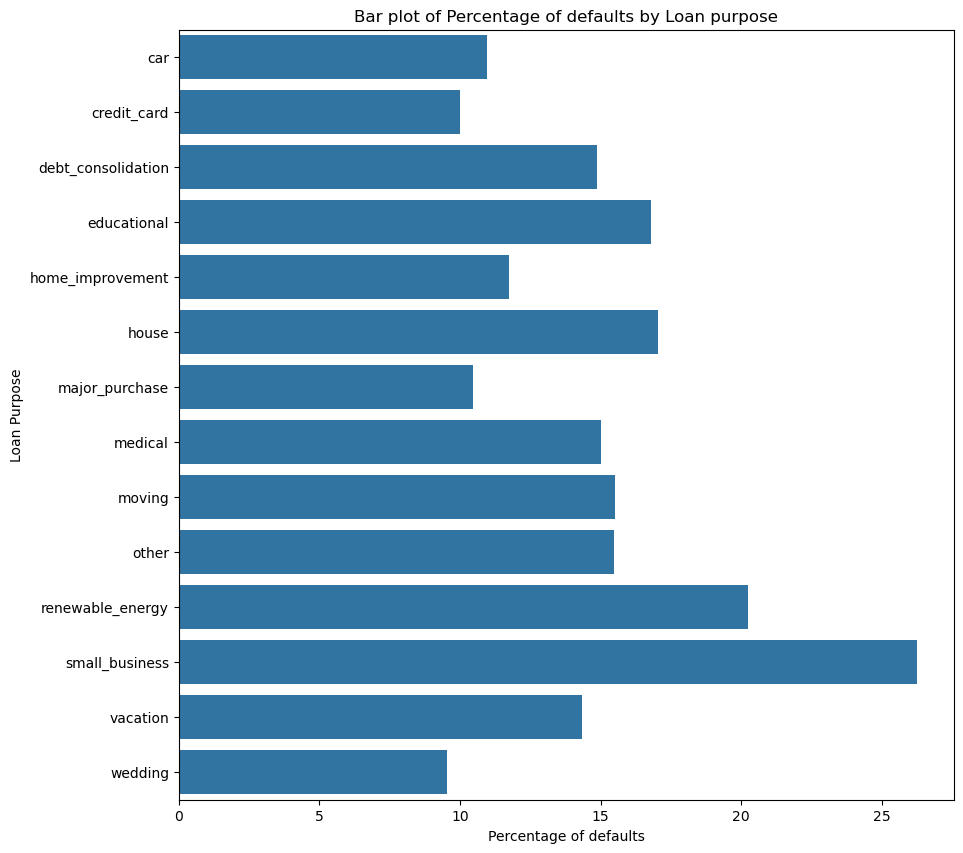

In [298]:
plt.figure(figsize=(10,10))
temp_df = loan_data.groupby(["purpose"])[["Is_Default","Is_Not_Default"]].sum()
temp_df["Percentage_Default"] = 100 * temp_df.Is_Default/(temp_df.Is_Default+temp_df.Is_Not_Default)
sns.barplot(y='purpose', x='Percentage_Default', data=temp_df)
plt.title('Bar plot of Percentage of defaults by Loan purpose')
plt.ylabel('Loan Purpose')
plt.xlabel('Percentage of defaults')
plt.show()

Analysis: From the above graph we can conclude that loan taken for / by small businesses is the most riskiest since they have the highest default rate 

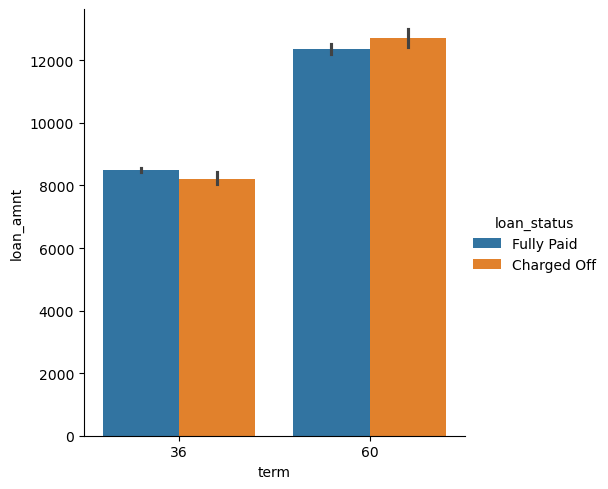

In [299]:
sns.catplot(x = 'term', y = 'loan_amnt', data = loan_data,hue = 'loan_status', kind = 'bar')

### Multivariate analysis
Heatmap for Correlation Matrix

A heatmap visualizes the correlation matrix of numeric variables, showing the strength and direction of linear relationships.

Purpose:
To identify highly correlated variables.
To understand the overall structure of relationships in the data.


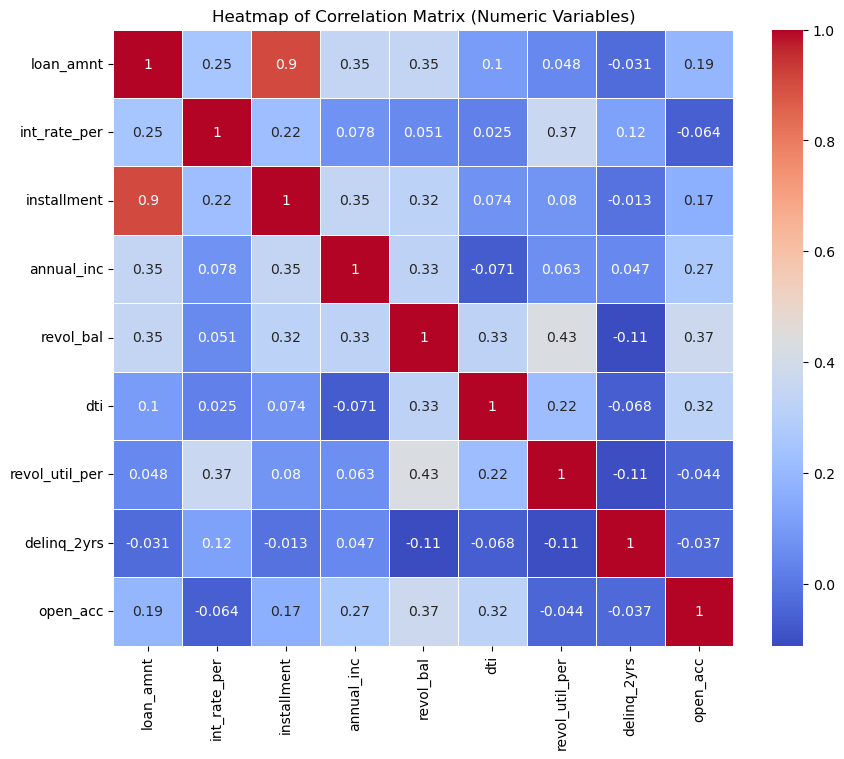

In [300]:
numeric_cols = ['loan_amnt', 'int_rate_per', 'installment','annual_inc','revol_bal','dti','revol_util_per','delinq_2yrs','open_acc']
numeric_data = charged_off[numeric_cols]

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix (Numeric Variables)')
plt.show()

Analysis: Installment and loan amount is highly co-related. revol_balance and revol_util_per is moderately co-related.

In [301]:
# we can also use pair plot to do above analysis

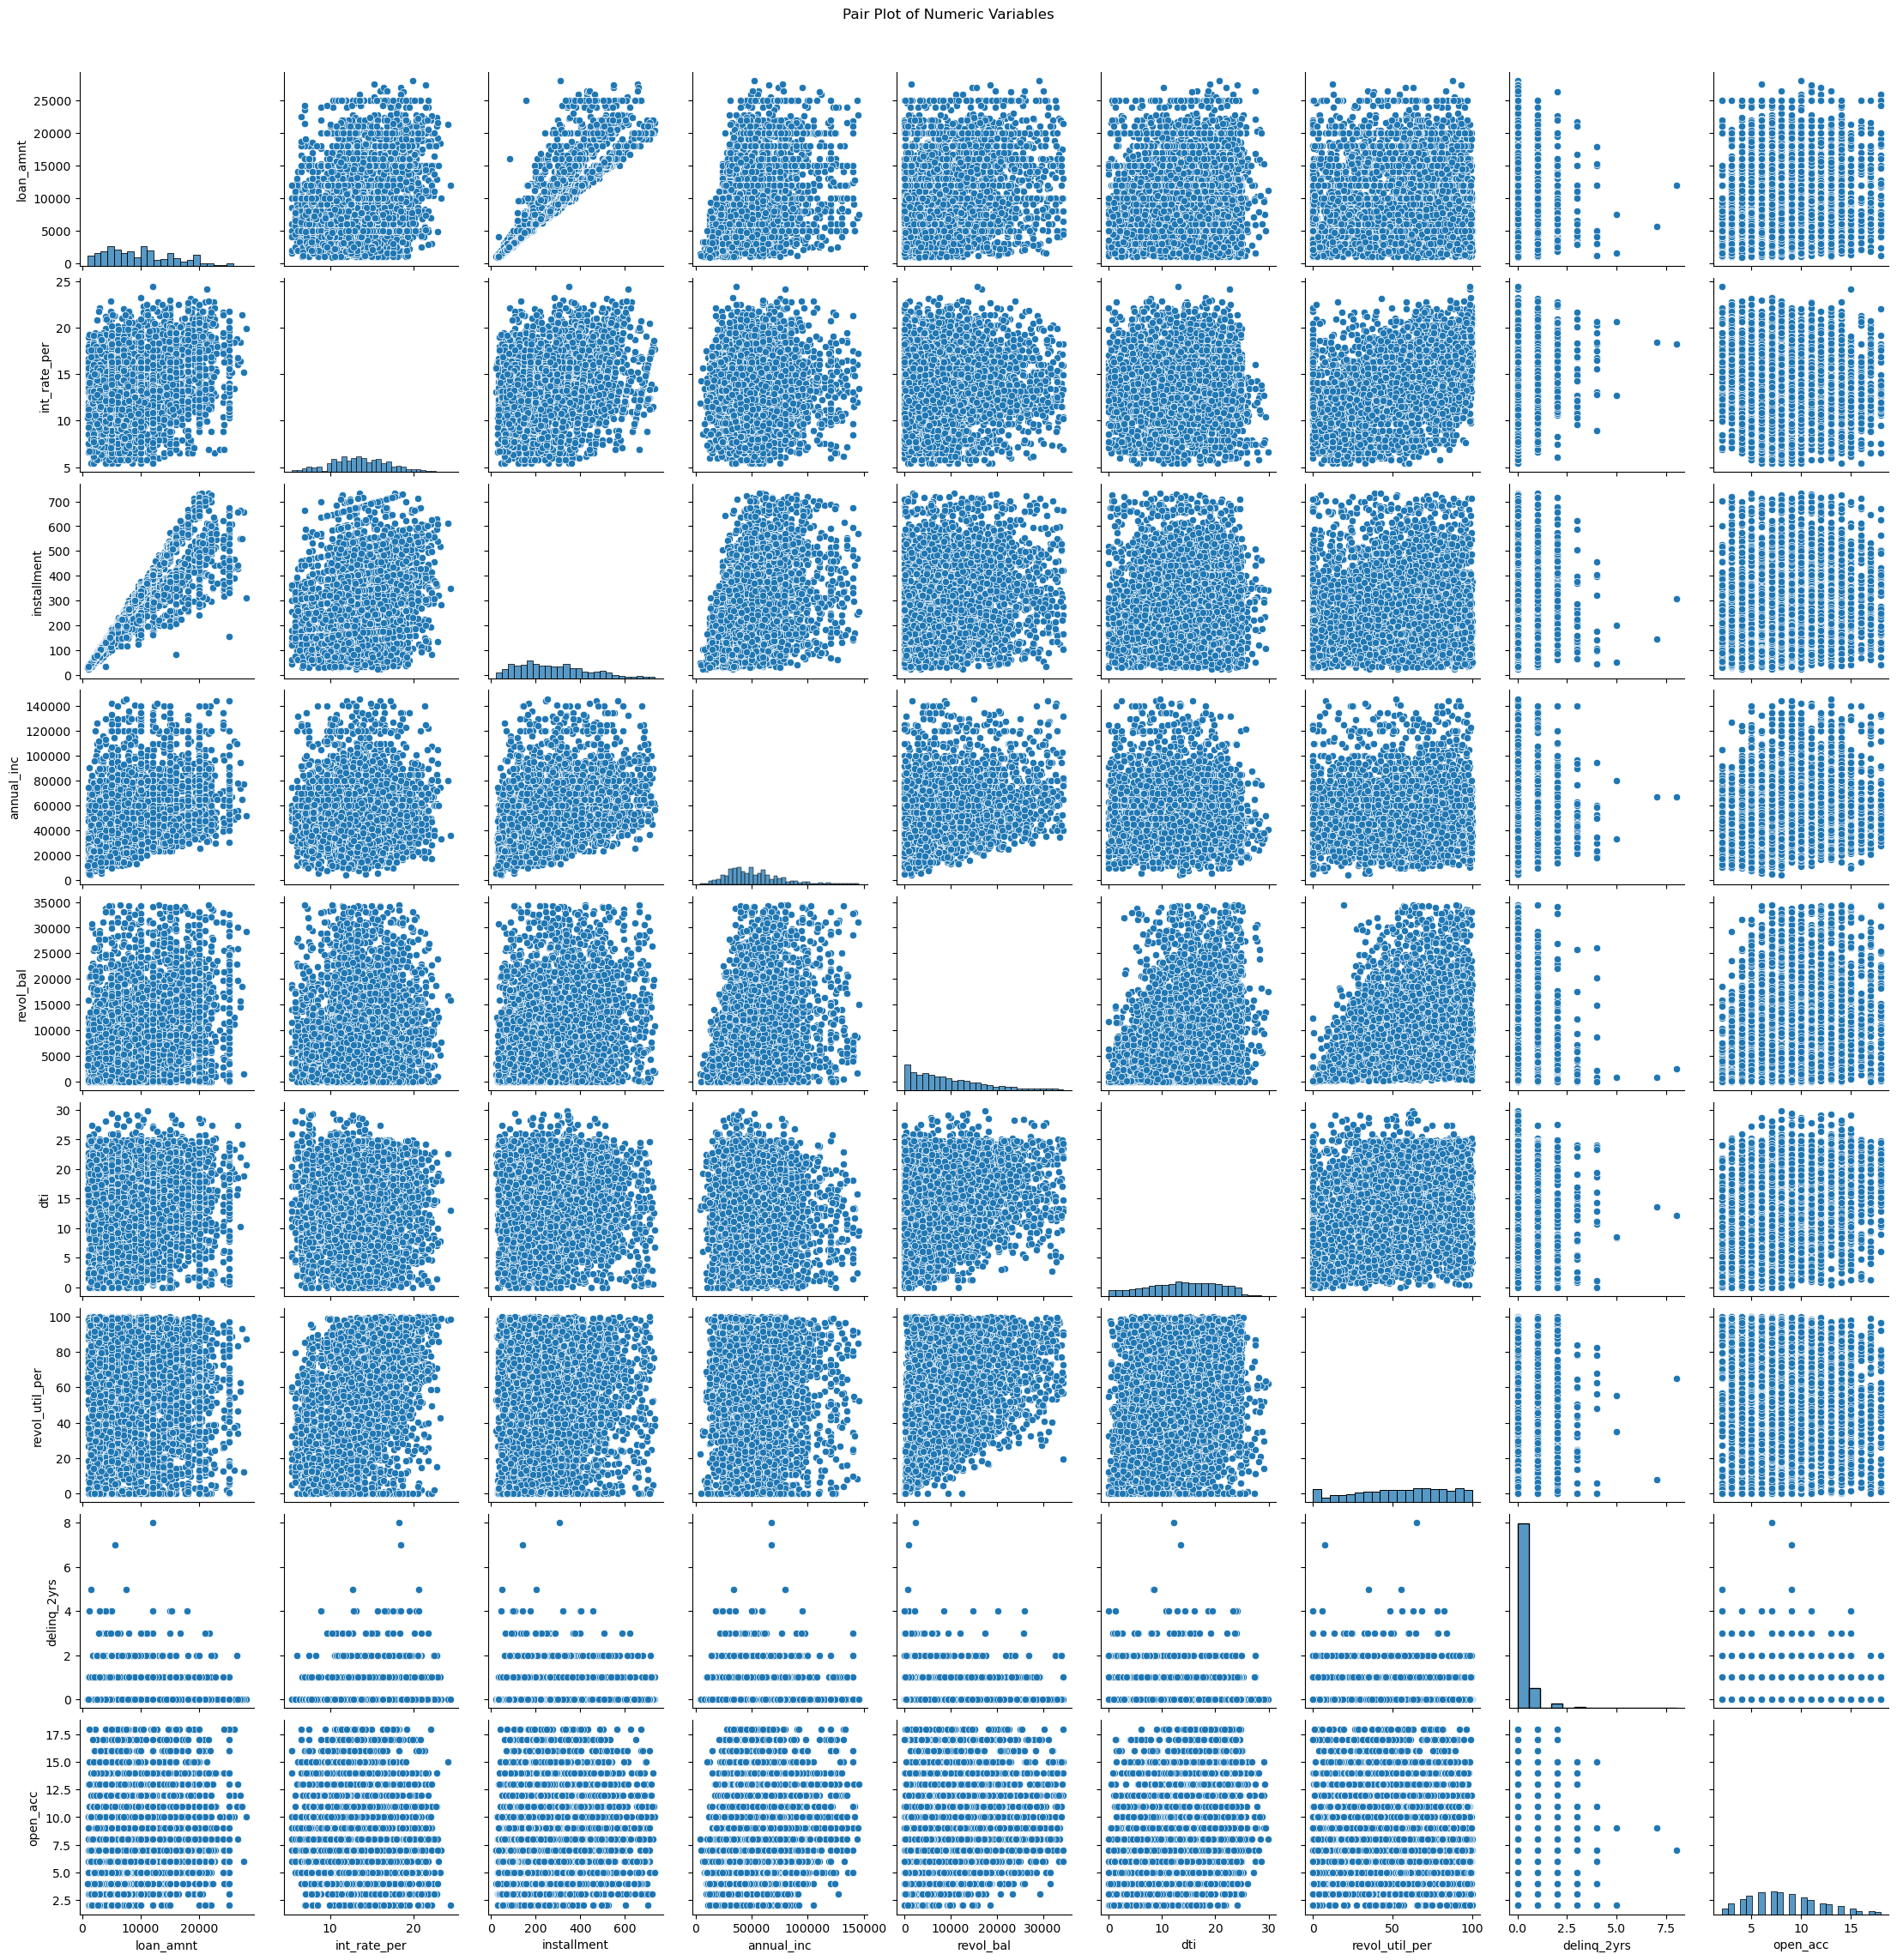

In [302]:
sns.pairplot(numeric_data)
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
plt.show()

We can co-relate what we saw in the heat map, i.e loan_amnt and installment are highly co-related. Higher the loan_amnt, higher is the installment.
(Double click on the graph, and it zooms in)

### Observation of driver variables



**The major driver variables are:**

- **Loan Amount**: Higher loan amounts increase the probability of applicants not paying their debt on time and getting charged off.
- **Interest Rate**: Applicants with higher interest rates on loan amounts are more prone to be in debt and get charged off.
- **Home Ownership**: Applicants who stay in rented accommodation have a higher chance of default.
- **Purpose**: Loans taken for/by small businesses are the riskiest since they have the highest default rate.
- **Annual Income**: Applicants with higher annual incomes are more likely to pay their loans on time.
- **Address State**: A very high percentage of defaults are happening for applicants from state **NE**. More stringent reviews need to be done for such applicants.
- **Verification Status**: Applicants who are not verified before receiving a loan are likely to default.
- **Grade**: B grade applicants are more likely to default.
